# Preprocesamiento

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random
import gc
import os
import IPython.display as ipd
import scipy.ndimage
import shutil

from tqdm import tqdm
from PIL import Image

### 📂 Rutas (Paths)

📂 `Se definen las rutas a las carpetas de archivos`

In [2]:
gen = './dataset/images/'

audio_path = "./dataset/train_audio/"
metadata_path = './dataset/train_metadata.csv'

images_path = os.path.join(gen, 'train_images/')
normalized_images_path = os.path.join(gen, 'normalized_train_images/')
filtered_images_path = os.path.join(gen, 'filtered_train_images/')


stft_mfcc_full_images_path = os.path.join(gen, 'stft_mfcc_full_train_images/')
stft_mel_full_images_path = os.path.join(gen, 'stft_mel_full_train_images/')

stft_mel_1mn_path = os.path.join(gen, 'stft_mel_1mn/')
stft_mfcc_1mn_path = os.path.join(gen, 'stft_mfcc_1mn/')

stft_mel_3mn_path = os.path.join(gen, 'stft_mel_3mn/')
stft_mfcc_3mn_path = os.path.join(gen, 'stft_mfcc_3mn/')

stft_mel_5mn_path = os.path.join(gen, 'stft_mel_5mn/')
stft_mfcc_5mn_path = os.path.join(gen, 'stft_mfcc_5mn/')

stft_mel_50_path = os.path.join(gen, 'stft_mel_50/')
stft_mfcc_50_path = os.path.join(gen, 'stft_mfcc_50/')

stft_mel_100_path = os.path.join(gen, 'stft_mel_100/')
stft_mfcc_100_path = os.path.join(gen, 'stft_mfcc_100/')

stft_mel_500_path = os.path.join(gen, 'stft_mel_500/')
stft_mfcc_500_path = os.path.join(gen, 'stft_mfcc_500/')

📄 **Se cargan los metadatos relacionados a los audios**

In [4]:
df = pd.read_csv(metadata_path)
df.shape

(24459, 12)

In [5]:
# Atributos nulos
df.isnull().sum()

primary_label         0
secondary_labels      0
type                  0
latitude            378
longitude           378
scientific_name       0
common_name           0
author                0
license               0
rating                0
url                   0
filename              0
dtype: int64

### 🏷️ Etiquetas (Labels)

In [6]:
arr_labels = df["primary_label"].unique()
# Total labels
print(f'Total labels: {arr_labels.shape[0]}')

Total labels: 182


### 📋 Se crea una lista de los audios y su etiqueta

In [7]:
list_audio = {key: [] for key in arr_labels}
print(list_audio)

{'asbfly': [], 'ashdro1': [], 'ashpri1': [], 'ashwoo2': [], 'asikoe2': [], 'asiope1': [], 'aspfly1': [], 'aspswi1': [], 'barfly1': [], 'barswa': [], 'bcnher': [], 'bkcbul1': [], 'bkrfla1': [], 'bkskit1': [], 'bkwsti': [], 'bladro1': [], 'blaeag1': [], 'blakit1': [], 'blhori1': [], 'blnmon1': [], 'blrwar1': [], 'bncwoo3': [], 'brakit1': [], 'brasta1': [], 'brcful1': [], 'brfowl1': [], 'brnhao1': [], 'brnshr': [], 'brodro1': [], 'brwjac1': [], 'brwowl1': [], 'btbeat1': [], 'bwfshr1': [], 'categr': [], 'chbeat1': [], 'cohcuc1': [], 'comfla1': [], 'comgre': [], 'comior1': [], 'comkin1': [], 'commoo3': [], 'commyn': [], 'compea': [], 'comros': [], 'comsan': [], 'comtai1': [], 'copbar1': [], 'crbsun2': [], 'cregos1': [], 'crfbar1': [], 'crseag1': [], 'dafbab1': [], 'darter2': [], 'eaywag1': [], 'emedov2': [], 'eucdov': [], 'eurbla2': [], 'eurcoo': [], 'forwag1': [], 'gargan': [], 'gloibi': [], 'goflea1': [], 'graher1': [], 'grbeat1': [], 'grecou1': [], 'greegr': [], 'grefla1': [], 'grehor1':

In [ ]:
# Se llena la lista con los nombres de los audios por especie
for filename in df["filename"]:
    key = filename.split('/')[0] # Código de la especie
    list_audio[key].append(filename)
    
print(list_audio)

### 🏷️ ➕➖ Se obtiene el Min, Max, de cantidad de audios por etiqueta (clase)

In [9]:
# Max y Min elementos de audio
conteo = df["primary_label"].value_counts()
print(conteo)

primary_label
zitcis1    500
lirplo     500
litgre1    500
comgre     500
comkin1    500
          ... 
blaeag1      6
wynlau1      6
niwpig1      5
asiope1      5
integr       5
Name: count, Length: 182, dtype: int64


### 🔢 Agrupando clases por cantidad de audios

In [10]:
group = {}
for label, t in conteo.items():
    if t not in group:
        group[t] = [] # Crea una lista si la clave no existe
    group[t].append(label) # Agrega la etiqueta a la lista correspondiente

print(group)

{500: ['zitcis1', 'lirplo', 'litgre1', 'comgre', 'comkin1', 'commoo3', 'comros', 'comsan', 'eaywag1', 'blrwar1', 'houspa', 'eucdov', 'eurcoo', 'hoopoe', 'graher1', 'grywag', 'grewar3', 'grnsan', 'bcnher', 'woosan', 'barswa', 'bkwsti'], 420: ['rorpar'], 405: ['litegr'], 302: ['comtai1'], 278: ['grtdro1'], 276: ['greegr'], 275: ['asikoe2'], 274: ['purher1'], 273: ['wemhar1'], 271: ['kenplo1'], 268: ['bkskit1'], 237: ['commyn'], 235: ['labcro1'], 231: ['blakit1'], 226: ['whiter2'], 224: ['putbab1'], 219: ['comior1'], 217: ['gyhcaf1'], 210: ['categr'], 201: ['rocpig'], 198: ['rerswa1'], 189: ['rewbul'], 185: ['whtkin2'], 173: ['blnmon1'], 167: ['whbwat1'], 163: ['gargan', 'grecou1'], 155: ['spodov', 'plapri1'], 153: ['crseag1'], 150: ['brnshr'], 142: ['grnwar1'], 141: ['blhori1'], 139: ['houcro1'], 137: ['piekin1'], 135: ['rewlap1'], 127: ['ruftre2'], 125: ['bladro1', 'pursun4'], 124: ['copbar1'], 123: ['litspi1'], 122: ['stbkin1', 'brnhao1'], 115: ['nutman', 'gybpri1'], 114: ['brodro1'], 

**Se agrupan las clases** de la siguiente manera:
- 📚 50 a 99 audios
- 📚 100 a 299 audios
- 📚 300 a 500 audios

In [11]:
# 50 to 99, 100 to 299, 300 to 500
del_labels = []
groups_of_group = {50 : [], 100 : [], 300 : []}

for t, label in group.items():
    if t <= 99 and t >= 50:
        groups_of_group[50].append(label)
    elif t <= 299 and t >= 100:
        groups_of_group[100].append(label)
    elif t <= 500 and t >= 300:
        groups_of_group[300].append(label)
    else:
        del_labels.append(label)

In [12]:
# Guardar los directorios de las especies
audios_paths = {}

for root, dirs, files in os.walk(audio_path):
    for audio in files:
        clase = os.path.basename(root) # Nombre de la carpeta
        dir_path = os.path.join(root, audio) # Path al audio
        
        if clase not in audios_paths:
            audios_paths[clase] = []
        audios_paths[clase].append(dir_path)

### 💾 Se guardan los grupos

In [12]:
pd.DataFrame(groups_of_group, columns=['Tiempo', 'Clase']).to_csv('groups_by_samples.csv', index=False)

### 🕐-🕓 Agrupando por tiempo de duración

**Se agrupan los audios por su tiempo de duración sin perder la clase a la que pertenece.**

Grupos:
- 🕜 30 a 60 segundos:
- 🕒 61 a 180 segundos:
- 🕠 181 a 300 segundos:

In [14]:
total_steps = sum(len(audios) for audios in list_audio.values())

durations = {}

selected_audios_1mn = {}
selected_audios_3mn = {}
selected_audios_5mn = {}
non_selected = {}

with tqdm(total=total_steps, dynamic_ncols=True) as pbar:
    for classe in audios_paths.keys():
        for audio_name in audios_paths[classe]:
            audio, sr = librosa.load(audio_name, sr=None)
            duration = librosa.get_duration(y=audio, sr=sr)

            if duration >= 30 and duration <= 60:
                if classe not in selected_audios_1mn:
                    selected_audios_1mn[classe] = []
                selected_audios_1mn[classe].append(audio_name)

            elif duration >= 61 and duration <=180:
                if classe not in selected_audios_3mn:
                    selected_audios_3mn[classe] = []
                selected_audios_3mn[classe].append(audio_name)

            elif duration >=181 and duration <= 300:
                if classe not in selected_audios_5mn:
                    selected_audios_5mn[classe] = []
                selected_audios_5mn[classe].append(audio_name)
            else:
                if classe not in non_selected:
                    non_selected[classe] = []
                non_selected[classe].append(audio_name)

            if classe not in durations:
                    durations[classe] = []
            durations[classe].append(duration)

            pbar.update(1)

100%|██████████| 24459/24459 [09:10<00:00, 44.42it/s] 


### 💾 Se guardan los grupos

In [16]:
data_1mn = [(classe, audio) for classe, audios in selected_audios_1mn.items() for audio in audios]
data_3mn = [(classe, audio) for classe, audios in selected_audios_3mn.items() for audio in audios]
data_5mn = [(classe, audio) for classe, audios in selected_audios_5mn.items() for audio in audios]

data_non_selected = [(classe, audio) for classe, audios in non_selected.items() for audio in audios]
data_durations = [(classe, audio) for classe, audios in durations.items() for audio in audios]

pd.DataFrame(data_1mn, columns=['Clase', 'Audio']).to_csv('./dataset/audio_time_1mn.csv', index=False)
pd.DataFrame(data_3mn, columns=['Clase', 'Audio']).to_csv('./dataset/audio_time_3mn.csv', index=False)
pd.DataFrame(data_5mn, columns=['Clase', 'Audio']).to_csv('./dataset/audio_time_5mn.csv', index=False)

pd.DataFrame(data_non_selected, columns=['Clase', 'Audio']).to_csv('./dataset/audio_time_non_selected.csv', index=False)
pd.DataFrame(data_durations, columns=['Clase', 'Audio']).to_csv('./dataset/audio_time_durations.csv', index=False)

# 📊 Gráficas

### 🔢 Cantidad de audios por clase

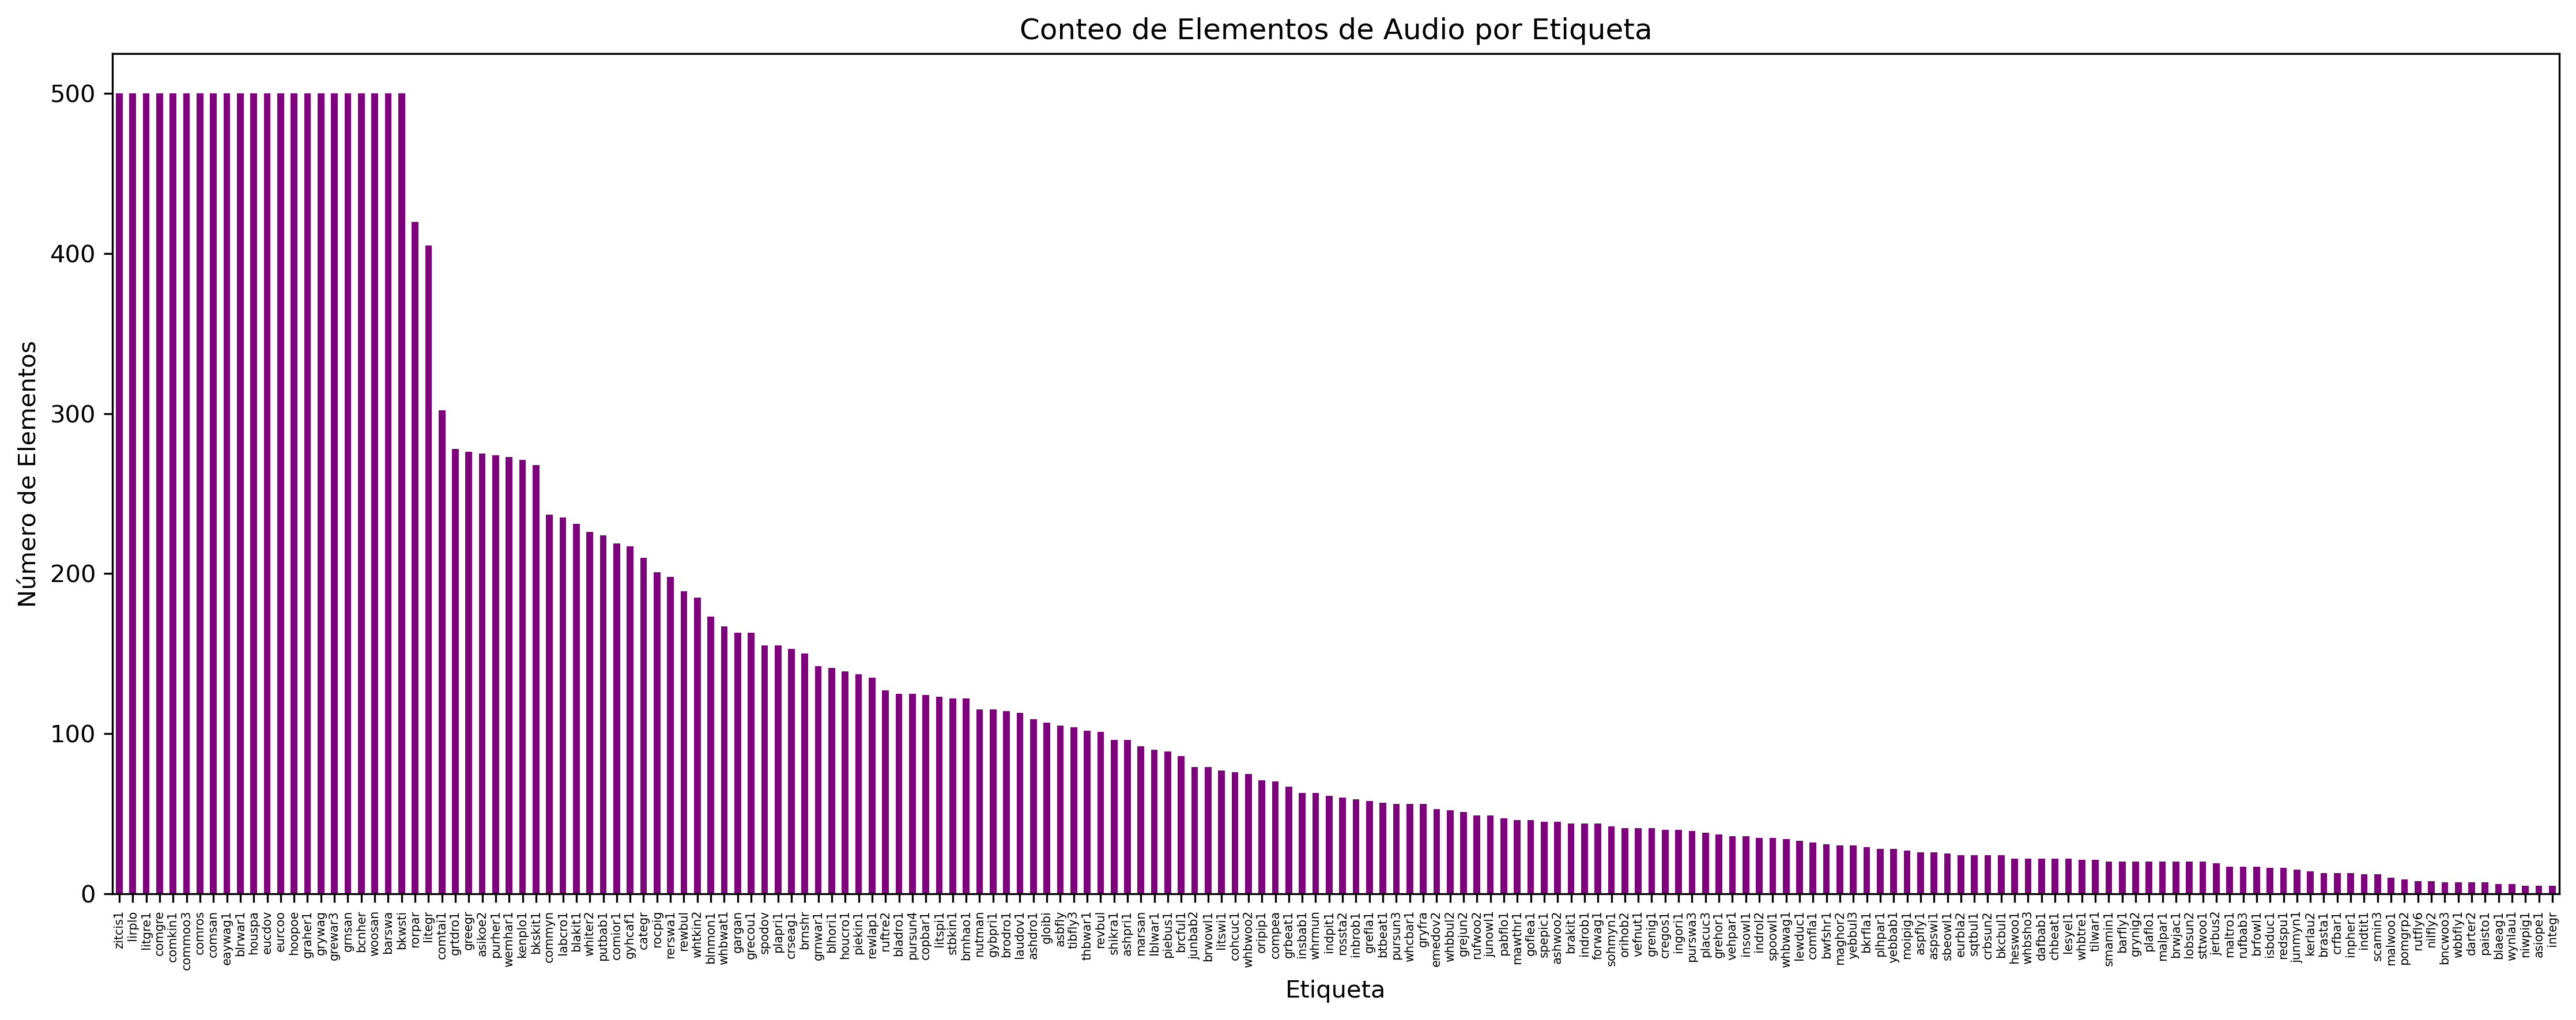

In [22]:
# Graficando
plt.figure(figsize=(15,6),dpi=300)
conteo.plot(kind='bar', color='purple')
plt.title("Conteo de Elementos de Audio por Etiqueta")
plt.xlabel("Etiqueta")
plt.ylabel("Número de Elementos")
plt.xticks(rotation=90, fontsize=5)
plt.tight_layout()
plt.show()

Se puede observar un gran desbalance en la cantidad de audios que hay por cada clase.

### 📚 Se visualizan cuantas clases tienen la misma cantidad de audios

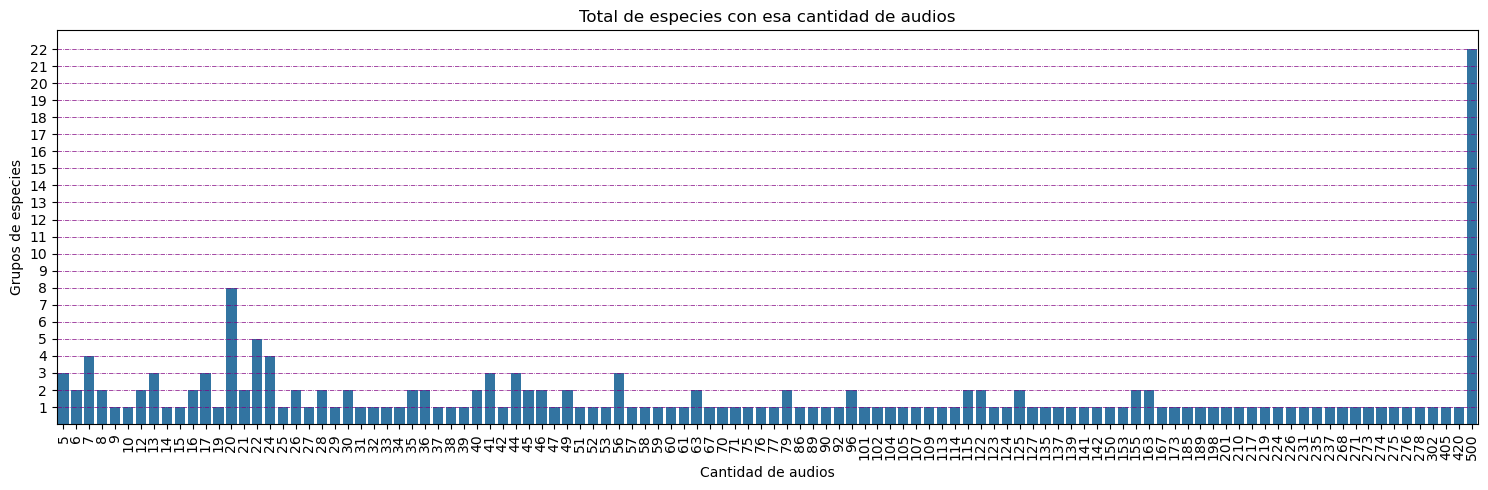

In [44]:
total_labels = {k: len(v) for k, v in group.items()}

keys = list(total_labels.keys())
vals = list(total_labels.values())

# Ajustar el eje x para que las marcas vayan de una en una

plt.figure(figsize=(15, 5))
sns.barplot(x=keys, y=vals, orient='v')
plt.title("Total de especies con esa cantidad de audios")
plt.xlabel("Cantidad de audios")
plt.ylabel("Grupos de especies")
plt.yticks(np.arange(min(vals), max(vals) + 1, 1))
plt.xticks(rotation=90)
plt.grid(axis='y', color = 'purple', linestyle = '-.', linewidth = 0.5)
plt.tight_layout()
plt.show()

### 📚 Visualizando los grupos de 50, 100 y 500 Audios

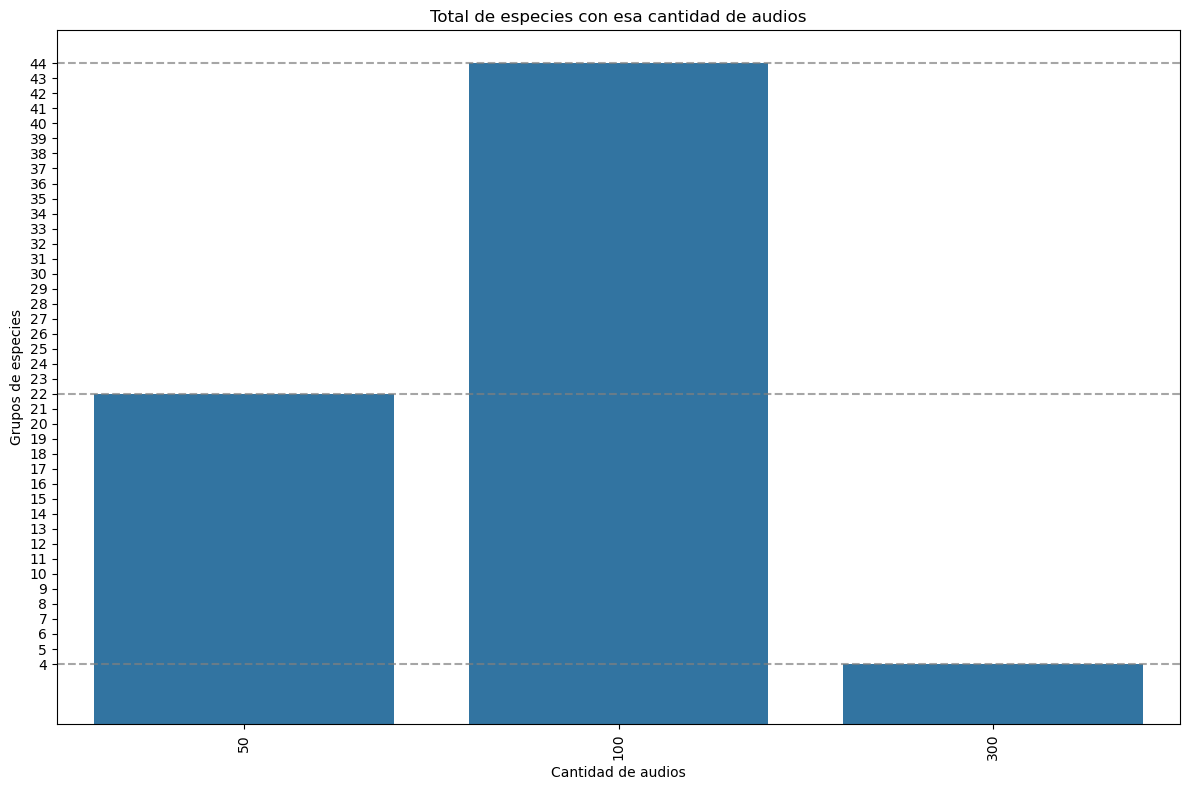

In [57]:
total_labels = {k: len(v) for k, v in groups_of_group.items()}

keys = list(total_labels.keys())
vals = list(total_labels.values())

# Crear la figura y el eje
plt.figure(figsize=(12, 8))

# Crear el gráfico de barras
ax = sns.barplot(x=keys, y=vals, orient='v')

# Ajustar el título y etiquetas
plt.title("Total de especies con esa cantidad de audios")
plt.xlabel("Cantidad de audios")
plt.ylabel("Grupos de especies")

# Agregar líneas horizontales justo donde termina cada barra
for y in vals:
    plt.axhline(y=y, color='gray', linestyle='--', alpha=0.7)

plt.yticks(np.arange(min(vals), max(vals) + 1, 1))
# Ajustar las etiquetas del eje x
plt.xticks(rotation=90)

# Ajustar el diseño para que se vea mejor
plt.tight_layout()

# Mostrar la gráfica
plt.show()

### 🔊 Visualización de la forma de onda

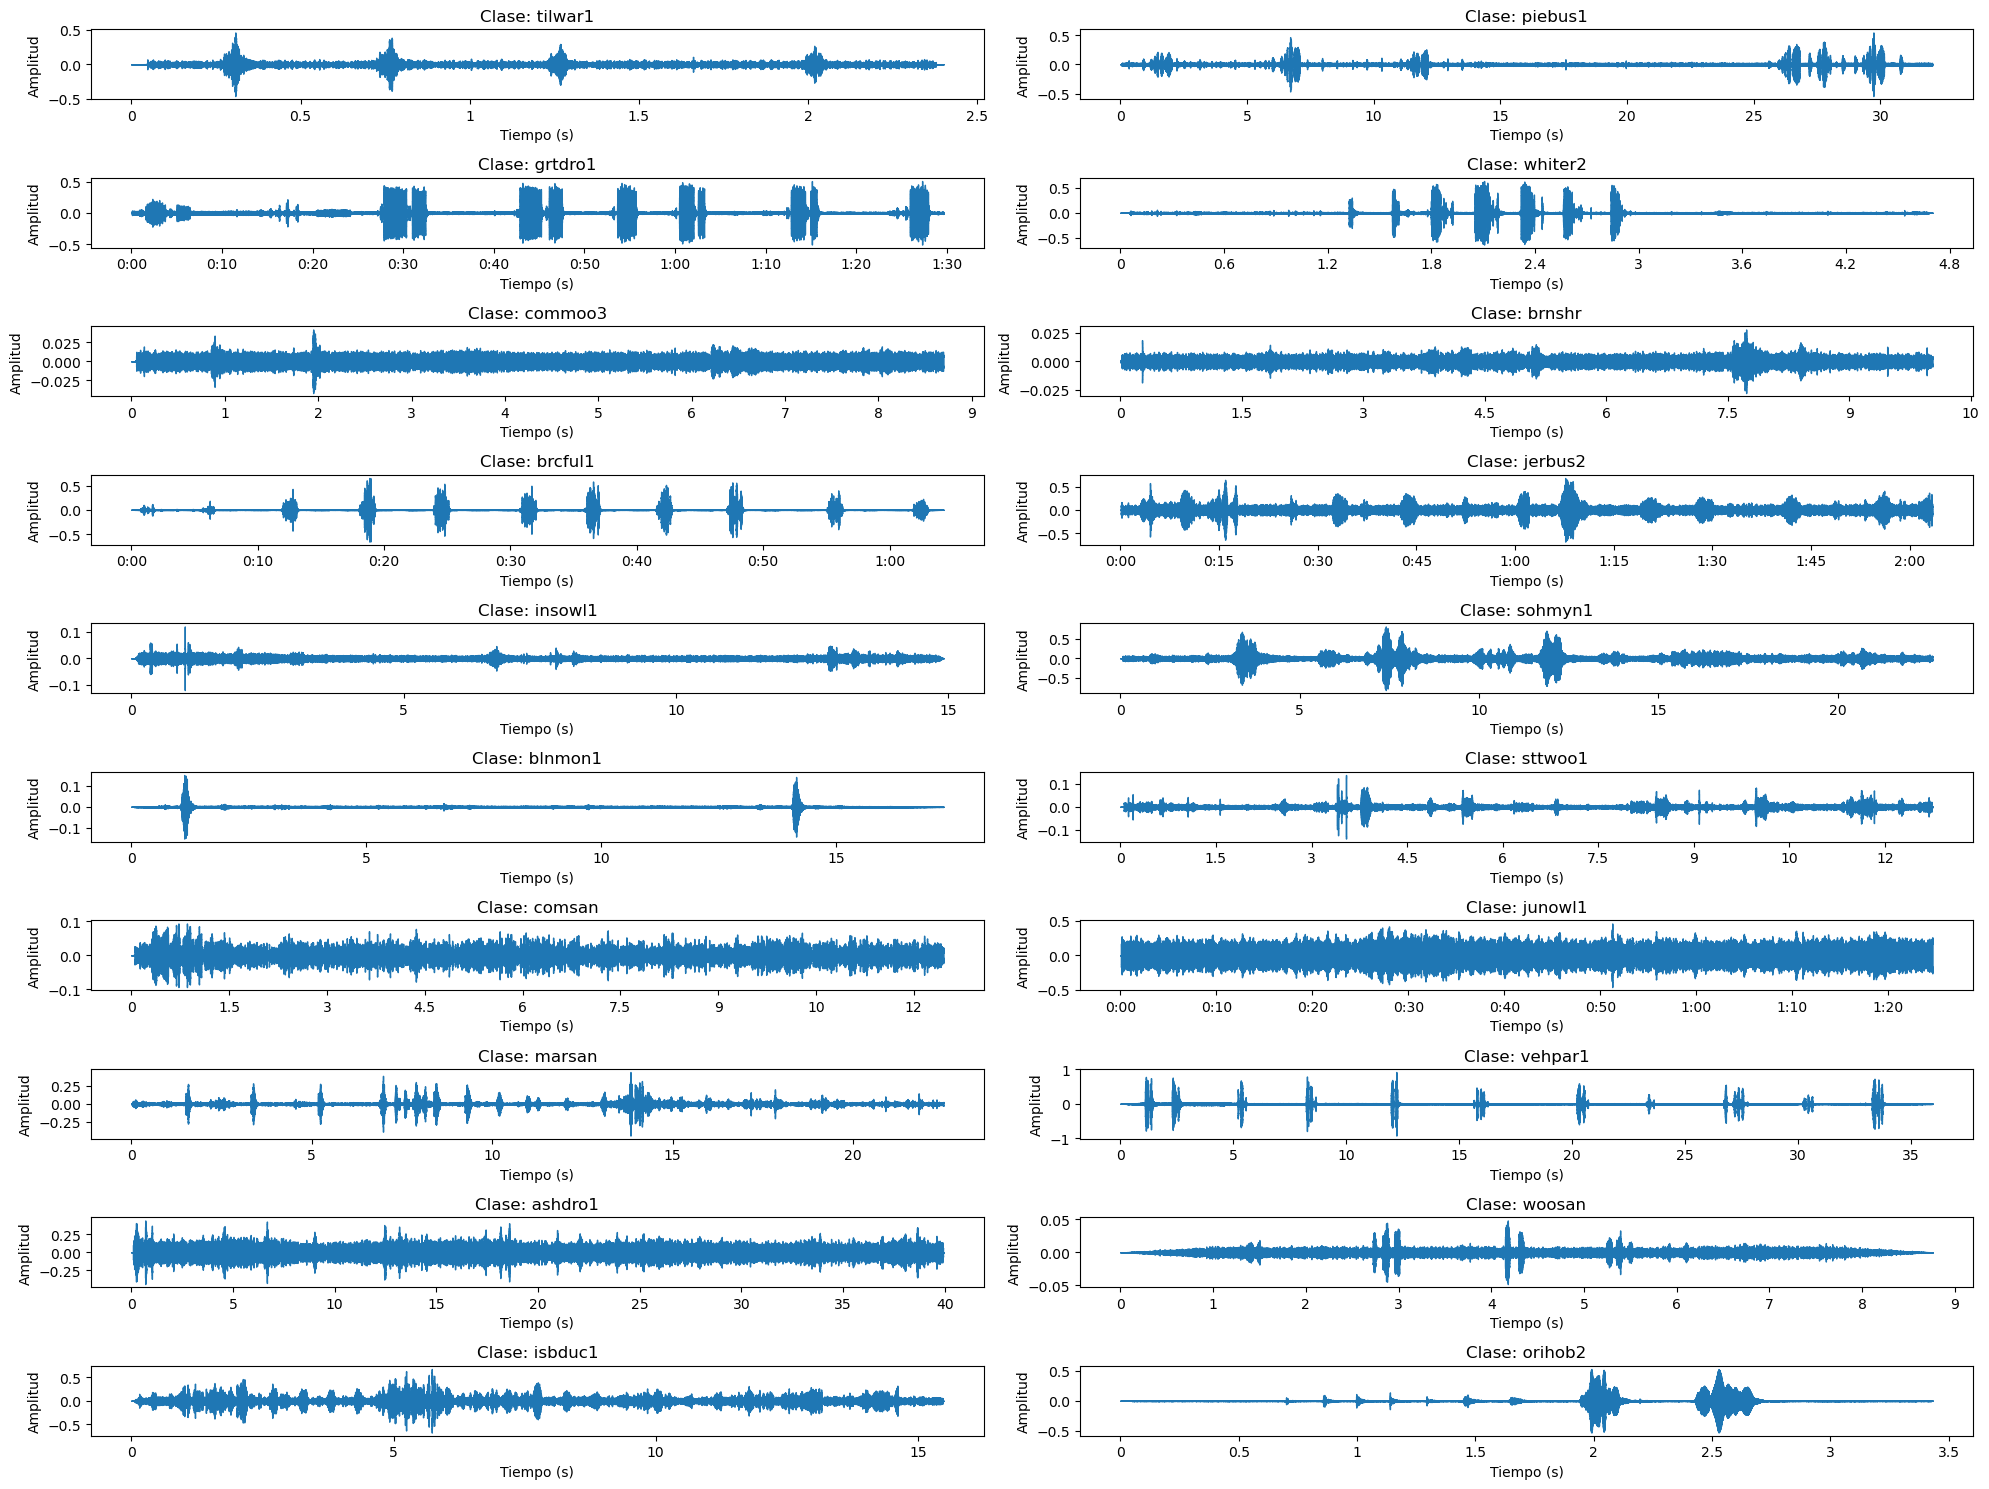

In [59]:
# Número de clases a mostrar
num_muestras = 20
clases = random.sample(list(audios_paths.keys()), num_muestras)

plt.figure(figsize=(20,15))
for i, clase in enumerate(clases):
    audio_path = random.choice(audios_paths[clase])
    audio, sr = librosa.load(audio_path, sr=None)
    plt.subplot(10, 2, i + 1) # Número de muestras a mostrar
    librosa.display.waveshow(audio, sr=sr)
    plt.title(f'Clase: {clase}')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()

### 🔊 Visualización del espectograma

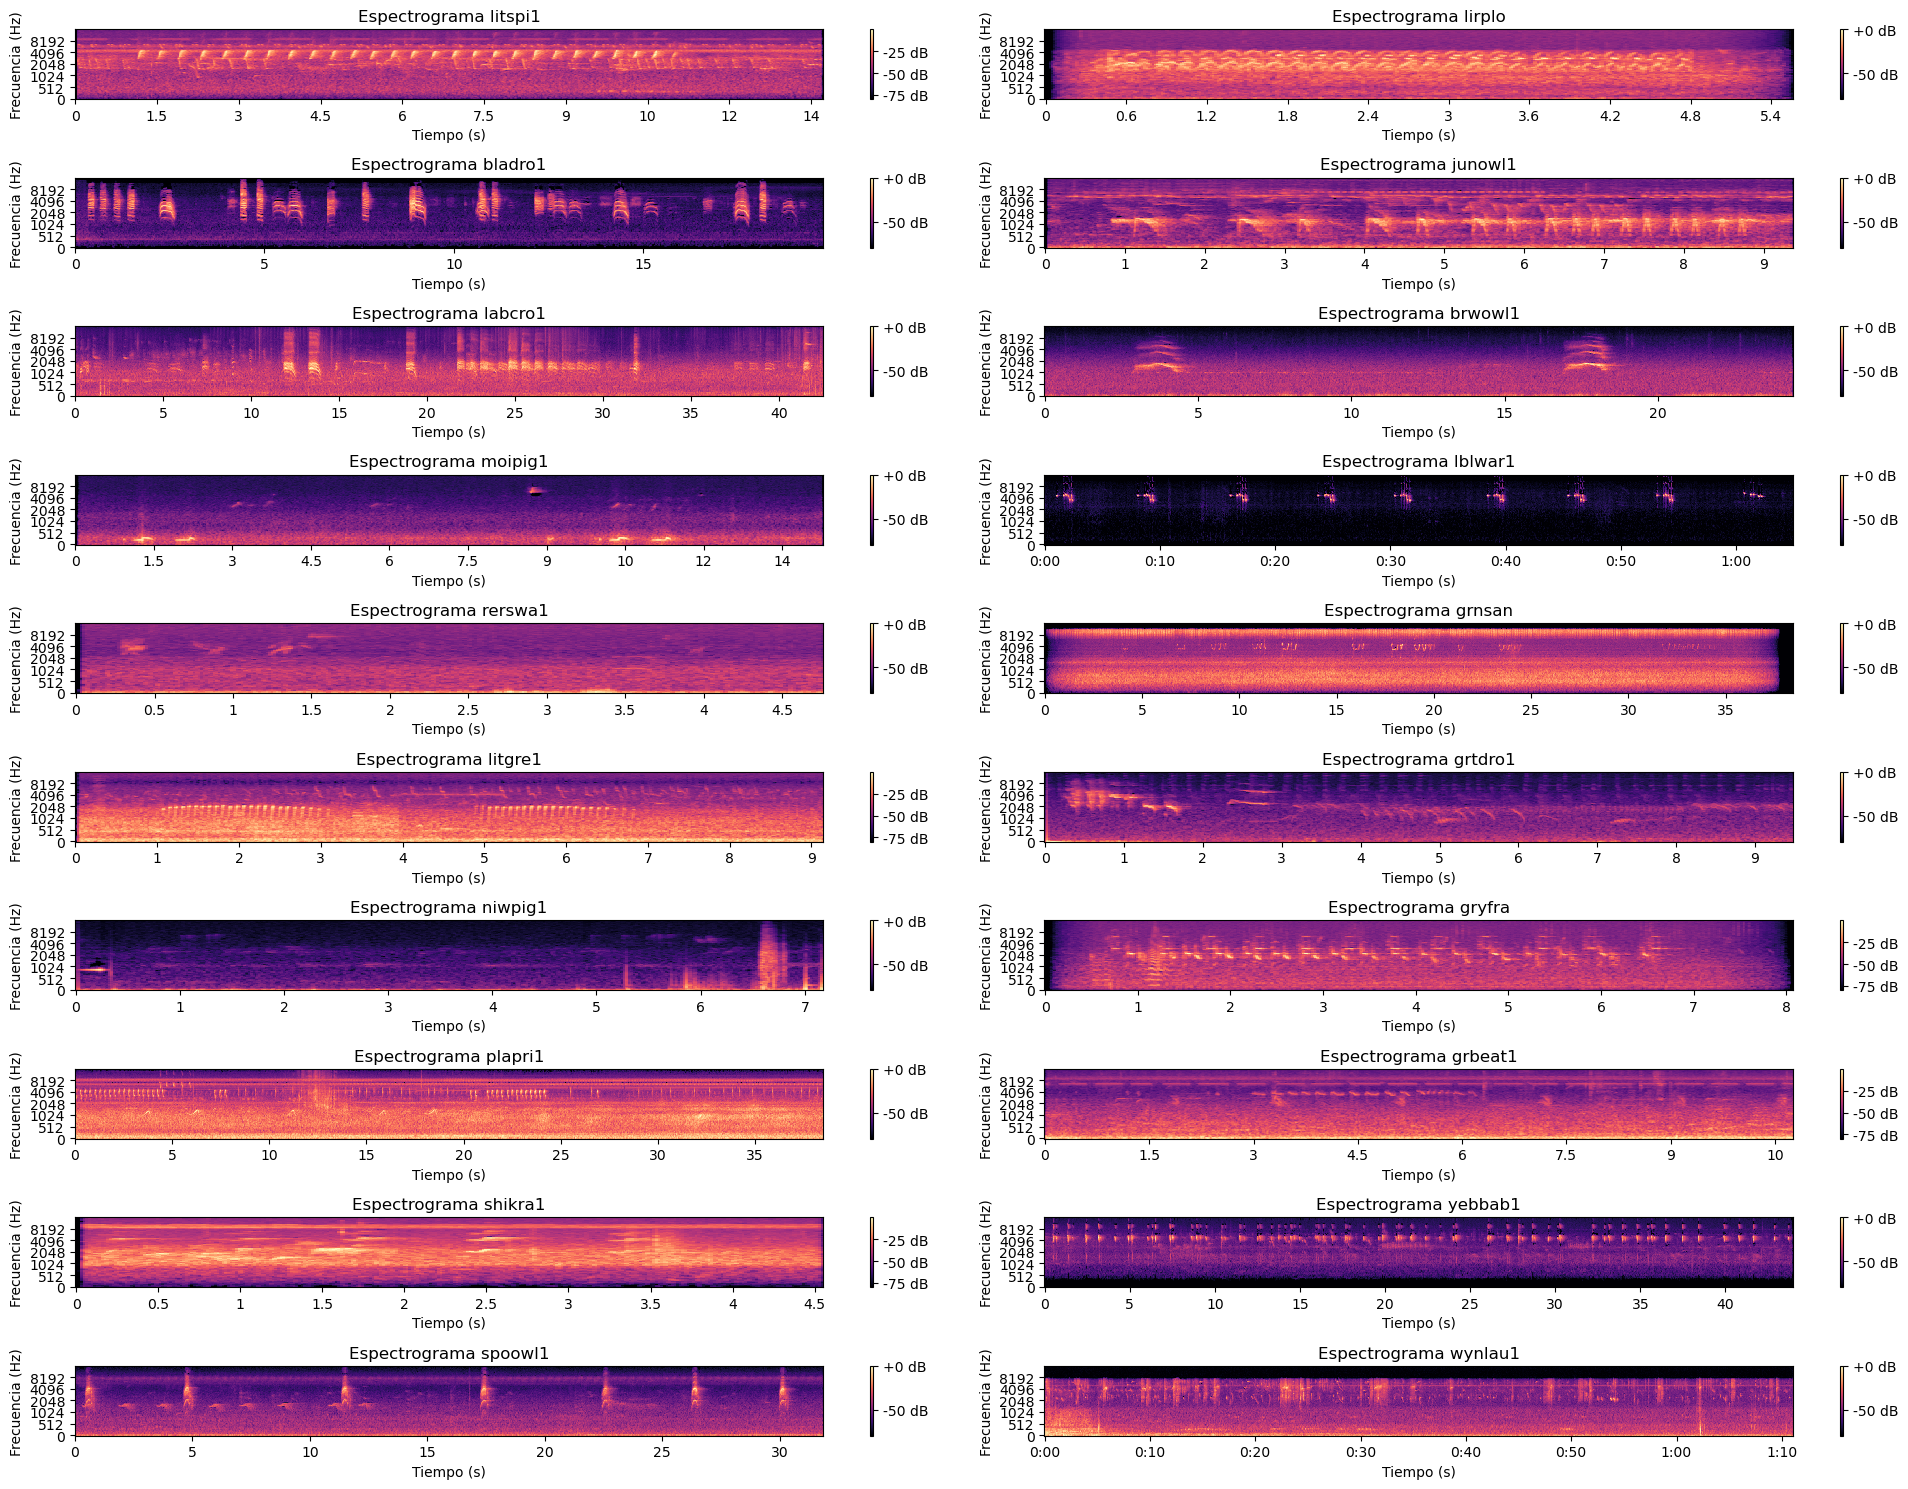

In [61]:
# Número de clases a mostrar
num_muestras = 20
clases = random.sample(list(audios_paths.keys()), num_muestras)

plt.figure(figsize=(20,15))
for i, clase in enumerate(clases):
    audio_path = random.choice(audios_paths[clase])
    audio, sr = librosa.load(audio_path, sr=None)
    
    # Calcular el espectrograma de potencia
    S = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=128)
    
    # Convertir a decibelios para mejor visualización
    S_dB = librosa.power_to_db(S, ref=np.max)

    plt.subplot(10, 2, i + 1) # Número de muestras a mostrar
    librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr)

    # Visualizar el espectrograma en decibelios (dB)
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Espectrograma {clase}')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Frecuencia (Hz)')

plt.tight_layout()
plt.show()

# 🗂️ Creación de folders

In [25]:
def make_folders(path, classes):
    full_path = os.path.join(path, path.split('/')[-2] + '/')

    os.makedirs(path, exist_ok=True)
    os.makedirs(full_path, exist_ok=True)

    for clase in classes:
        folder = os.path.join(full_path, clase)

        try:
            os.makedirs(folder, exist_ok=True)
            print(f'Carpeta creada: {folder}')
        except Exception as e:
            print(f'Error al crear la carpeta {folder}: {e}')
            
    return full_path

In [ ]:
images_path = make_folders(images_path) #
normalized_images_path = make_folders(normalized_images_path) #
filtered_images_path = make_folders(filtered_images_path) #

stft_mel_full_images_path = make_folders(stft_mel_full_images_path)
stft_mfcc_full_images_path = make_folders(stft_mfcc_full_images_path)

# 🖼️ Creando Imágenes

#### 🎶💻🔊 Imágenes MFCC

Mel-Frequency Cepstral Coefficients (MFCC) son extraídos del cepstrum en las
frecuencias de Mel (MFC), que representa el espectro de energía de un instante de una señal,
transformado de acuerdo a la escala de Mel. [1](#Referencias)

In [ ]:
with tqdm(total=total_steps, dynamic_ncols=True) as pbar:
    for i, clase in enumerate(audios_paths.keys()):
        pbar.set_description(f'Procesando {clase} Label({i + 1})')
        for audio_path in audios_paths[clase]:
            audio, sr = librosa.load(audio_path, sr=None)
            mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=30, fmin=2000, fmax=7000)

            plt.figure(figsize=(3, 3))
            librosa.display.specshow(mfcc, x_axis="time", sr=sr)
            plt.axis('off')
            plt.imshow(mfcc, cmap='inferno', aspect='auto')
            plt.tight_layout()

            image_path = images_path + clase+ '/' + audio_path.split('\\')[-1].replace('.ogg', '.jpg')

            plt.savefig(image_path, bbox_inches='tight', dpi=128, pad_inches=0, transparent=None, format='jpg')
            plt.close('all')

            del audio, mfcc
            gc.collect()
            
            pbar.update(1)

#### ➗ Normalization

Normalizando las imágenes a rangos de 0 a 1

In [ ]:
with tqdm(total=total_steps, dynamic_ncols=True) as pbar:
    for i, clase in enumerate(audios_paths.keys()):
        pbar.set_description(f'Procesando {clase} Label({i + 1})')
        for audio_path in audios_paths[clase]:
            audio, sr = librosa.load(audio_path, sr=None)
            mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=30, fmin=2000, fmax=7000)

            mfcc_normalized = (mfcc - mfcc.min()) / (mfcc.max() - mfcc.min()) # 0 a 1

            plt.figure(figsize=(3, 3))
            librosa.display.specshow(mfcc_normalized, x_axis="time", sr=sr)
            plt.axis('off')
            plt.imshow(mfcc_normalized, cmap='inferno', aspect='auto')
            plt.tight_layout()

            image_path = normalized_images_path + clase+ '/' + audio_path.split('\\')[-1].replace('.ogg', '.jpg')

            plt.savefig(image_path, bbox_inches='tight', dpi=128, pad_inches=0, transparent=None, format='jpg')
            plt.clf()
            plt.close('all')
            
            del audio, mfcc, mfcc_normalized
            gc.collect()

            pbar.update(1)

#### 🔲 Noise Reduction

Se usa la librería de scipy con ndimage para cortar el ruido y con librosa usando la funcion trim de effects se eliminan los silencios.

`scipy.ndimage.median_filter` aplica un filtro de mediana. Este filtro reemplaza cada valor en la imagen con la mediana de los valores de los píxeles en su vecindad, lo que es útil para eliminar ruido, especialmente el "ruido sal y pimienta" (salt-and-pepper noise).

`librosa.effects.trim` recorta silencios al inicio y al final de un archivo de audio.

In [ ]:
with tqdm(total=total_steps, dynamic_ncols=True) as pbar:
    for i, clase in enumerate(audios_paths.keys()):
        pbar.set_description(f'Procesando {clase} Label({i + 1})')
        for audio_path in audios_paths[clase]:
            audio, sr = librosa.load(audio_path, sr=None)
            audio_trimmed, _ = librosa.effects.trim(audio) # Eliminar silencios
            mfcc = librosa.feature.mfcc(y=audio_trimmed, sr=sr, n_mfcc=30, fmin=2000, fmax=7000)

            mfcc_filtered = scipy.ndimage.median_filter(mfcc, size=3) # Cortar ruido
            
            plt.figure(figsize=(3, 3))
            librosa.display.specshow(mfcc_filtered, x_axis="time", sr=sr)
            plt.axis('off')
            plt.imshow(mfcc_filtered, cmap='inferno', aspect='auto')
            plt.tight_layout()

            image_path = filtered_images_path + clase+ '/' + audio_path.split('\\')[-1].replace('.ogg', '.jpg')

            plt.savefig(image_path, bbox_inches='tight', dpi=128, pad_inches=0, transparent=None, format='jpg')
            plt.close('all')

            del audio, mfcc, mfcc_filtered, audio_trimmed
            gc.collect()
            
            pbar.update(1)

# MFCC y espectograma de Mel

Se calcula el `espectrograma Mel` del audio usando la función `librosa.feature.melspectrogram`, que genera una representación espectral de la señal, transformada a la escala de Mel. Luego, la amplitud de las frecuencias se convierte a decibelios (dB) con `librosa.power_to_db` para facilitar la visualización.

Para la generación de las imágenes de `MFCC`, primero se combierte la señal de frecuencia a escala de Mel y posteriormente a decibelios, se emplea después una técnica de compensación de canal conocida como `CMVN` (por sus siglas en inglés, Cepstral Mean and Variance Normalization), que consiste en la **normalización de la media y la varianza de los coeficientes cepstrales**. Esta técnica tiene como objetivo mitigar las variaciones indeseadas entre las grabaciones de audio, tales como cambios en la amplitud, el ruido de fondo o las diferencias de canal.

In [ ]:
n_fft = 2048
hop_length = 512
n_mels = 128

with tqdm(total=total_steps, dynamic_ncols=True) as pbar:
    for i, clase in enumerate(audios_paths.keys()):
        pbar.set_description(f'Procesando {clase} Label({i + 1})')
        for audio_path in audios_paths[clase]:
            audio, sr = librosa.load(audio_path, sr=None)

            # Escalado con banco de filtros de mel
            # Generar el espectrograma de Mel
            S = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
            S_dB = librosa.power_to_db(S, ref=np.max)

            # Convierte el espectrograma de mel en MFCC
            mfcc = librosa.feature.mfcc(S=librosa.power_to_db(S), sr=sr, n_mfcc=13)

            # x' = x - mean / std
            # Centrar (restar la media de cada coeficiente a través de todos los frames)
            mean = np.mean(mfcc, axis=1, keepdims=True) # Media por coeficiente
            mfcc_centered = mfcc - mean

            # Escalar (dividir por la desviación estaándar de cada coeficiente)
            std = np.std(mfcc_centered, axis=1, keepdims=True) # Desviación estándar por coeficiente
            mfcc_normalized = mfcc_centered / std
            
            plt.figure(figsize=(10, 4))
            librosa.display.specshow(S_dB, hop_length=hop_length, sr=sr, x_axis="time", y_axis="mel")
            plt.axis('off')
            plt.tight_layout()

            image_path_1 = stft_mel_full_images_path + clase+ '/' + audio_path.split('\\')[-1].replace('.ogg', '.jpg')
            
            plt.savefig(image_path_1, bbox_inches='tight', dpi=128, pad_inches=0, transparent=None, format='jpg')
            plt.clf()
            plt.close('all')


            plt.figure(figsize=(10, 4))
            librosa.display.specshow(mfcc_normalized, x_axis="time", sr=sr)
            plt.axis('off')
            plt.tight_layout()
            
            image_path = stft_mfcc_full_images_path + clase+ '/' + audio_path.split('\\')[-1].replace('.ogg', '.jpg')
            
            plt.savefig(image_path, bbox_inches='tight', dpi=128, pad_inches=0, transparent=None, format='jpg')
            plt.clf()
            plt.close('all')

            del audio, mfcc, S
            gc.collect()

            pbar.update(1)

## 🖼️ Imágenes

Se comparan visualmente imágenes aleatorias de Mel y MFCC.

In [ ]:
# Número de clases a mostrar
num_muestras = 20
selected_images = []

folders_mel = [os.path.join(stft_mel_full_images_path, folder) for folder in os.listdir(stft_mel_full_images_path) if os.path.isdir(os.path.join(stft_mel_full_images_path, folder))]

while len(selected_images) < 20:
    random_class_folder_mel = random.choice(folders_mel)

    images_in_class = [f for f in os.listdir(random_class_folder_mel) if f.endswith(('.png', '.jpg', '.jpeg'))]
    
    if images_in_class:
        random_image = random.choice(images_in_class)
        folder_name = random_class_folder_mel.replace('stft_mel_full_train_images', 'stft_mfcc_full_train_images')
        selected_images.append((os.path.join(random_class_folder_mel, random_image), os.path.join(folder_name, random_image)))


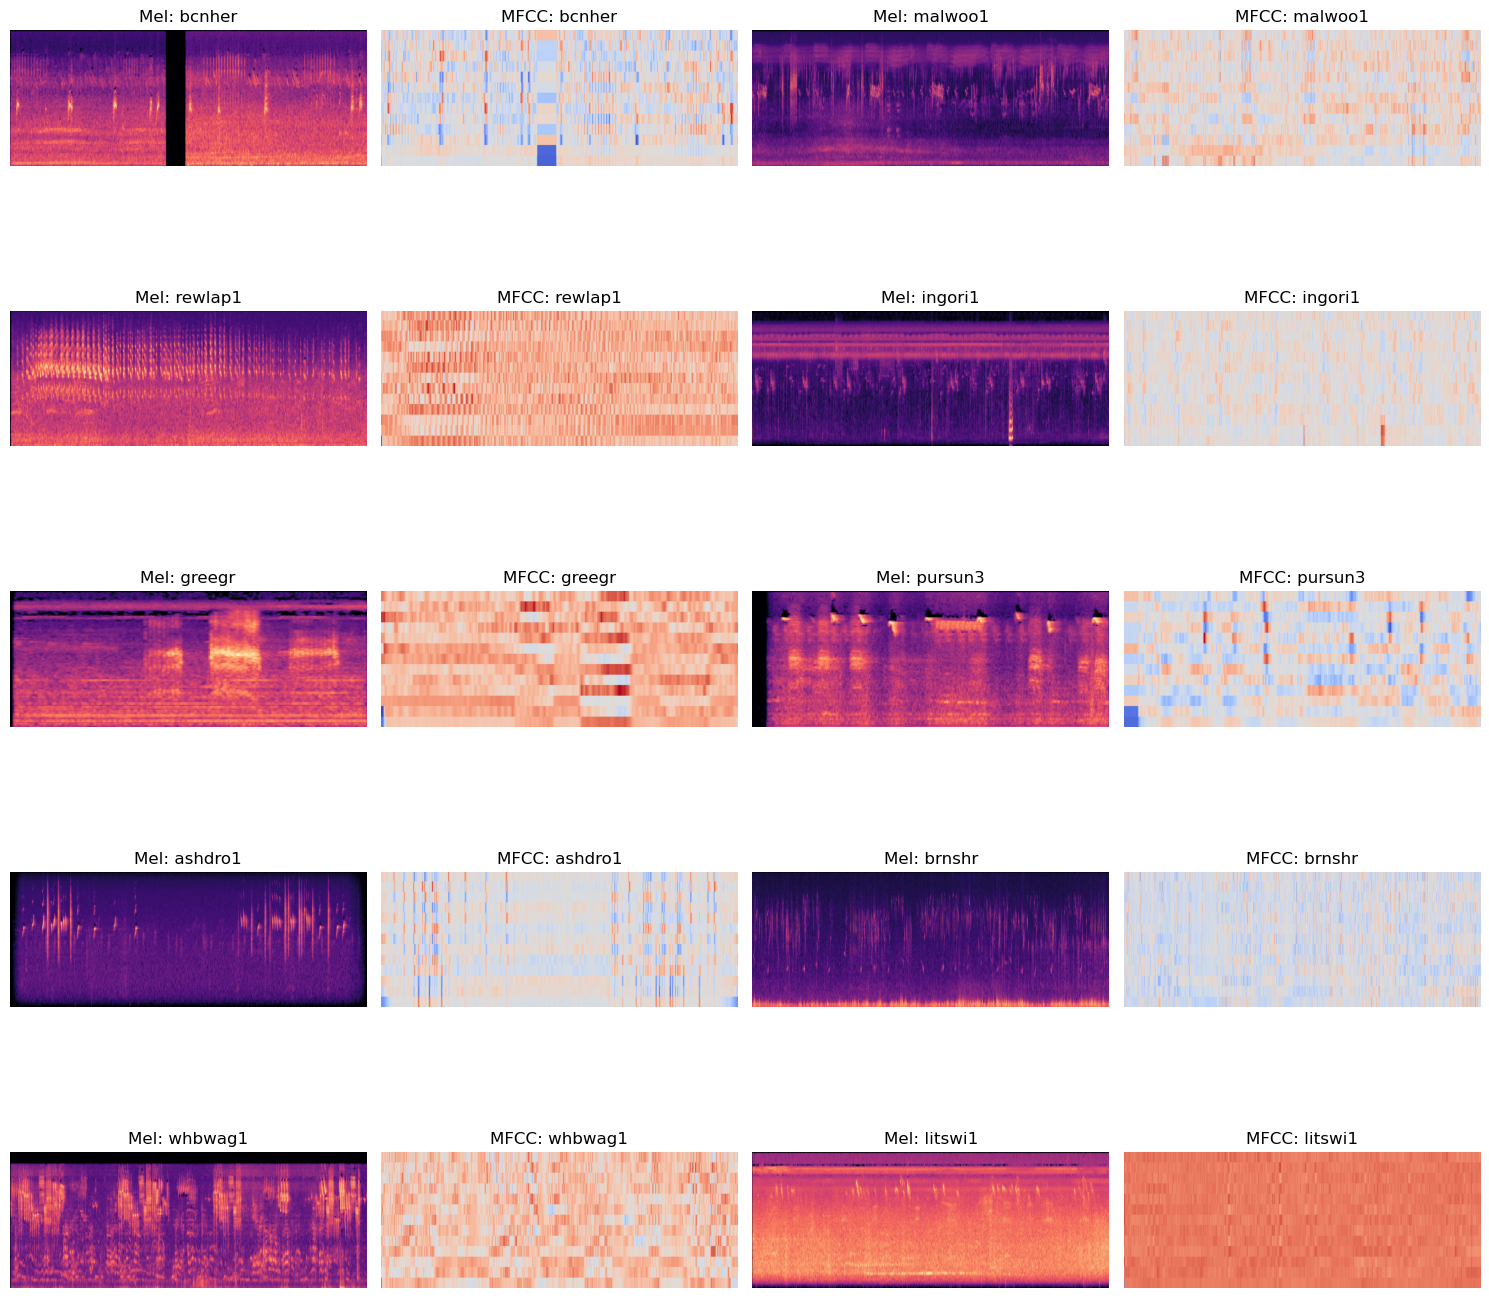

In [98]:
# Crear una figura con subplots para mostrar las 20 imágenes
plt.figure(figsize=(15, 15))

# Mostrar cada imagen en un subplot
for i, (mel_image, mfcc_image)  in enumerate(selected_images[:10]):
    # Abrir la imagen
    img_mel = Image.open(mel_image)
    img_mfcc = Image.open(mfcc_image)
    
    # Crear un subplot para la imagen STFT-Mel
    ax = plt.subplot(5, 4, 2 * i + 1)  # Crear una cuadrícula de 4 filas x 5 columnas
    ax.imshow(img_mel)
    ax.axis('off')  # Ocultar los ejes
    ax.set_title(f"Mel: {os.path.basename(os.path.dirname(mel_image))}")
    
    # Crear un subplot para la imagen STFT-MFCC
    ax = plt.subplot(5, 4, 2 * i + 2)  # Al lado de la imagen Mel
    ax.imshow(img_mfcc)
    ax.axis('off')  # Ocultar los ejes
    ax.set_title(f"MFCC: {os.path.basename(os.path.dirname(mfcc_image))}")

# Ajustar el espacio entre los subplots
plt.tight_layout()
plt.show()

Se puede observar cómo las imágenes MFCC capturan las características del espectrograma de audio

# 🔊 Seleccionando audios

In [17]:
df_1mn = pd.read_csv('./dataset/audio_time_1mn.csv')
df_3mn = pd.read_csv('./dataset/audio_time_3mn.csv')
df_5mn = pd.read_csv('./dataset/audio_time_5mn.csv')

df_non_selected = pd.read_csv('./dataset/audio_time_non_selected.csv')
df_time_durations = pd.read_csv('./dataset/audio_time_durations.csv')

### 🎧 Gráfico de audios

Duración de los audios por clase

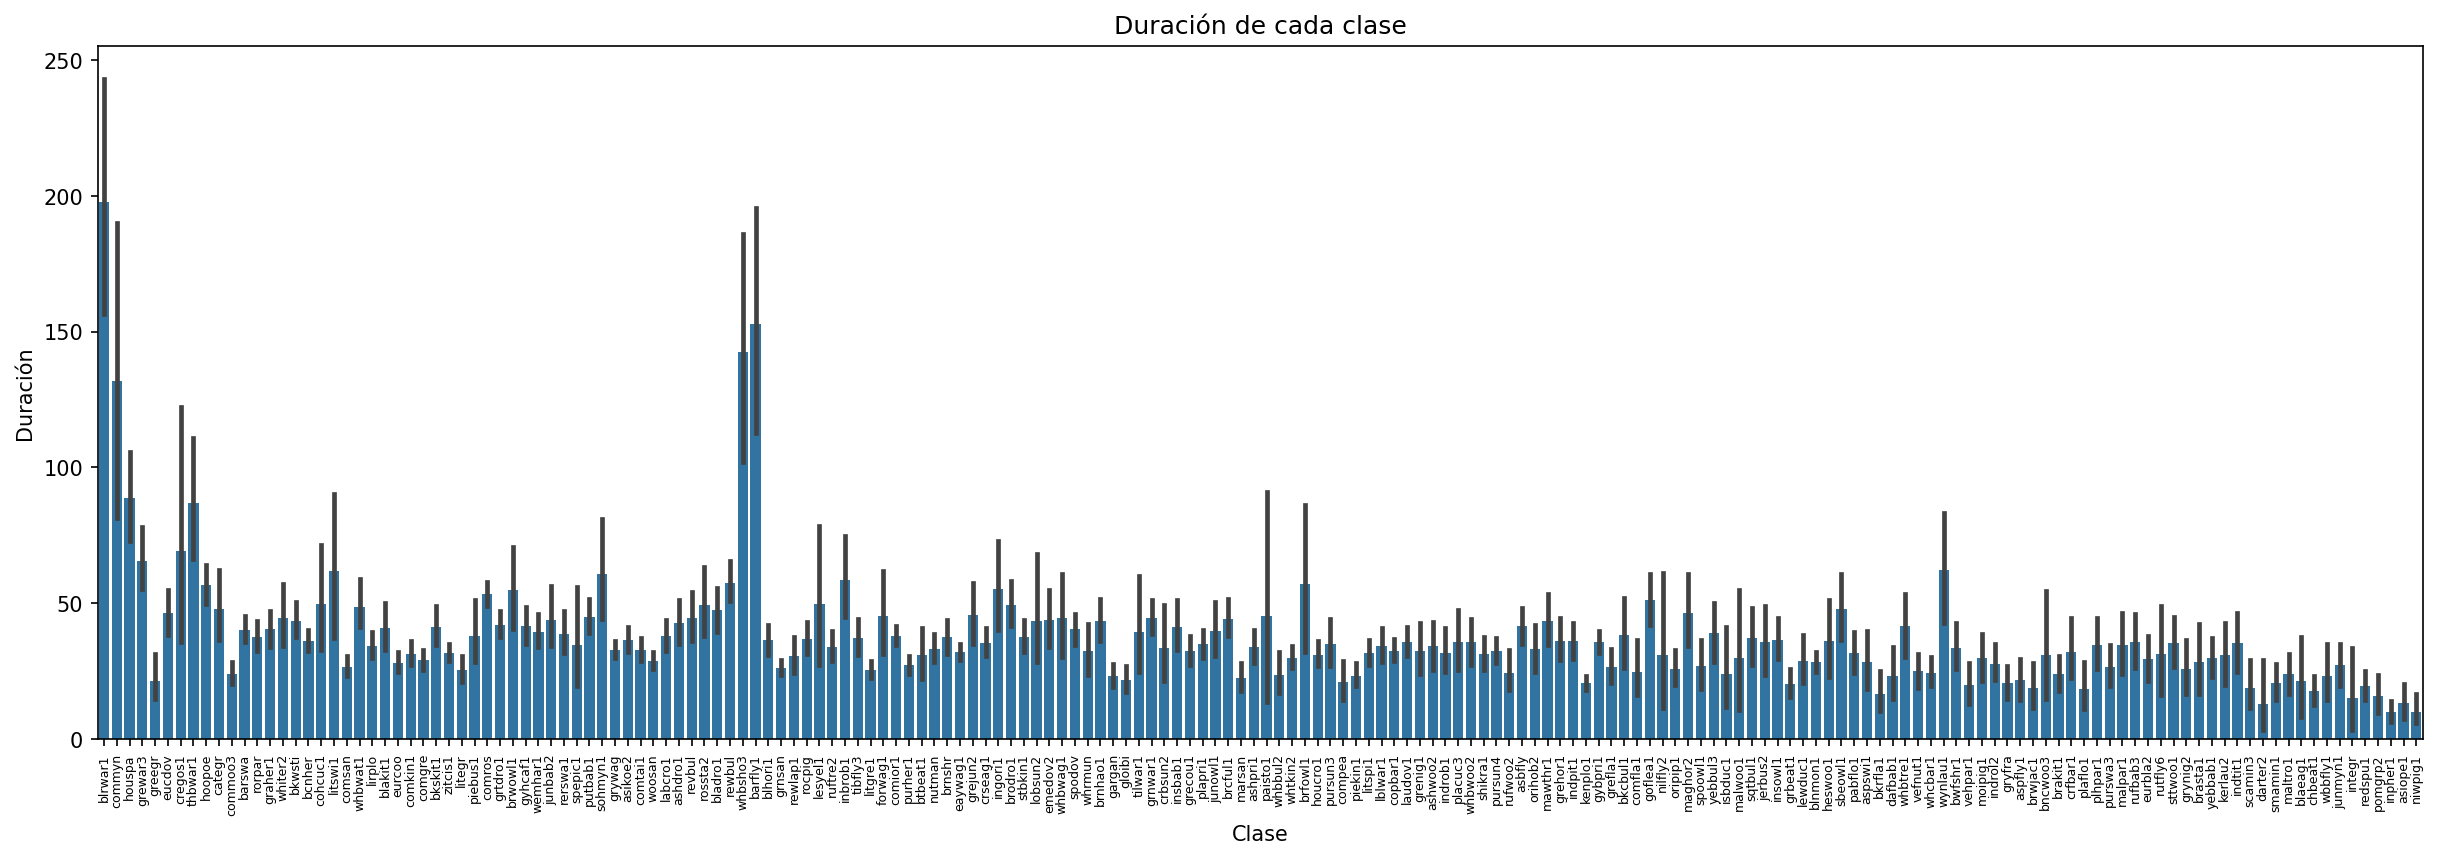

In [41]:
df_audios = df_time_durations.copy()

df_audios = df_audios.sort_values(by='Audio', ascending=False)

plt.figure(figsize=(20, 6), dpi=150)
sns.barplot(y='Audio', x='Clase', data=df_audios)
plt.title('Duración de cada clase')
plt.xlabel('Clase')
plt.ylabel('Duración')
plt.xticks(fontsize=6,rotation=90)
plt.show()

In [18]:
con_1mn = df_1mn['Clase'].value_counts()
con_3mn = df_3mn['Clase'].value_counts()
con_5mn = df_5mn['Clase'].value_counts()

### 🕐 1 min Audios

Total de audios de 1 minuto por clase

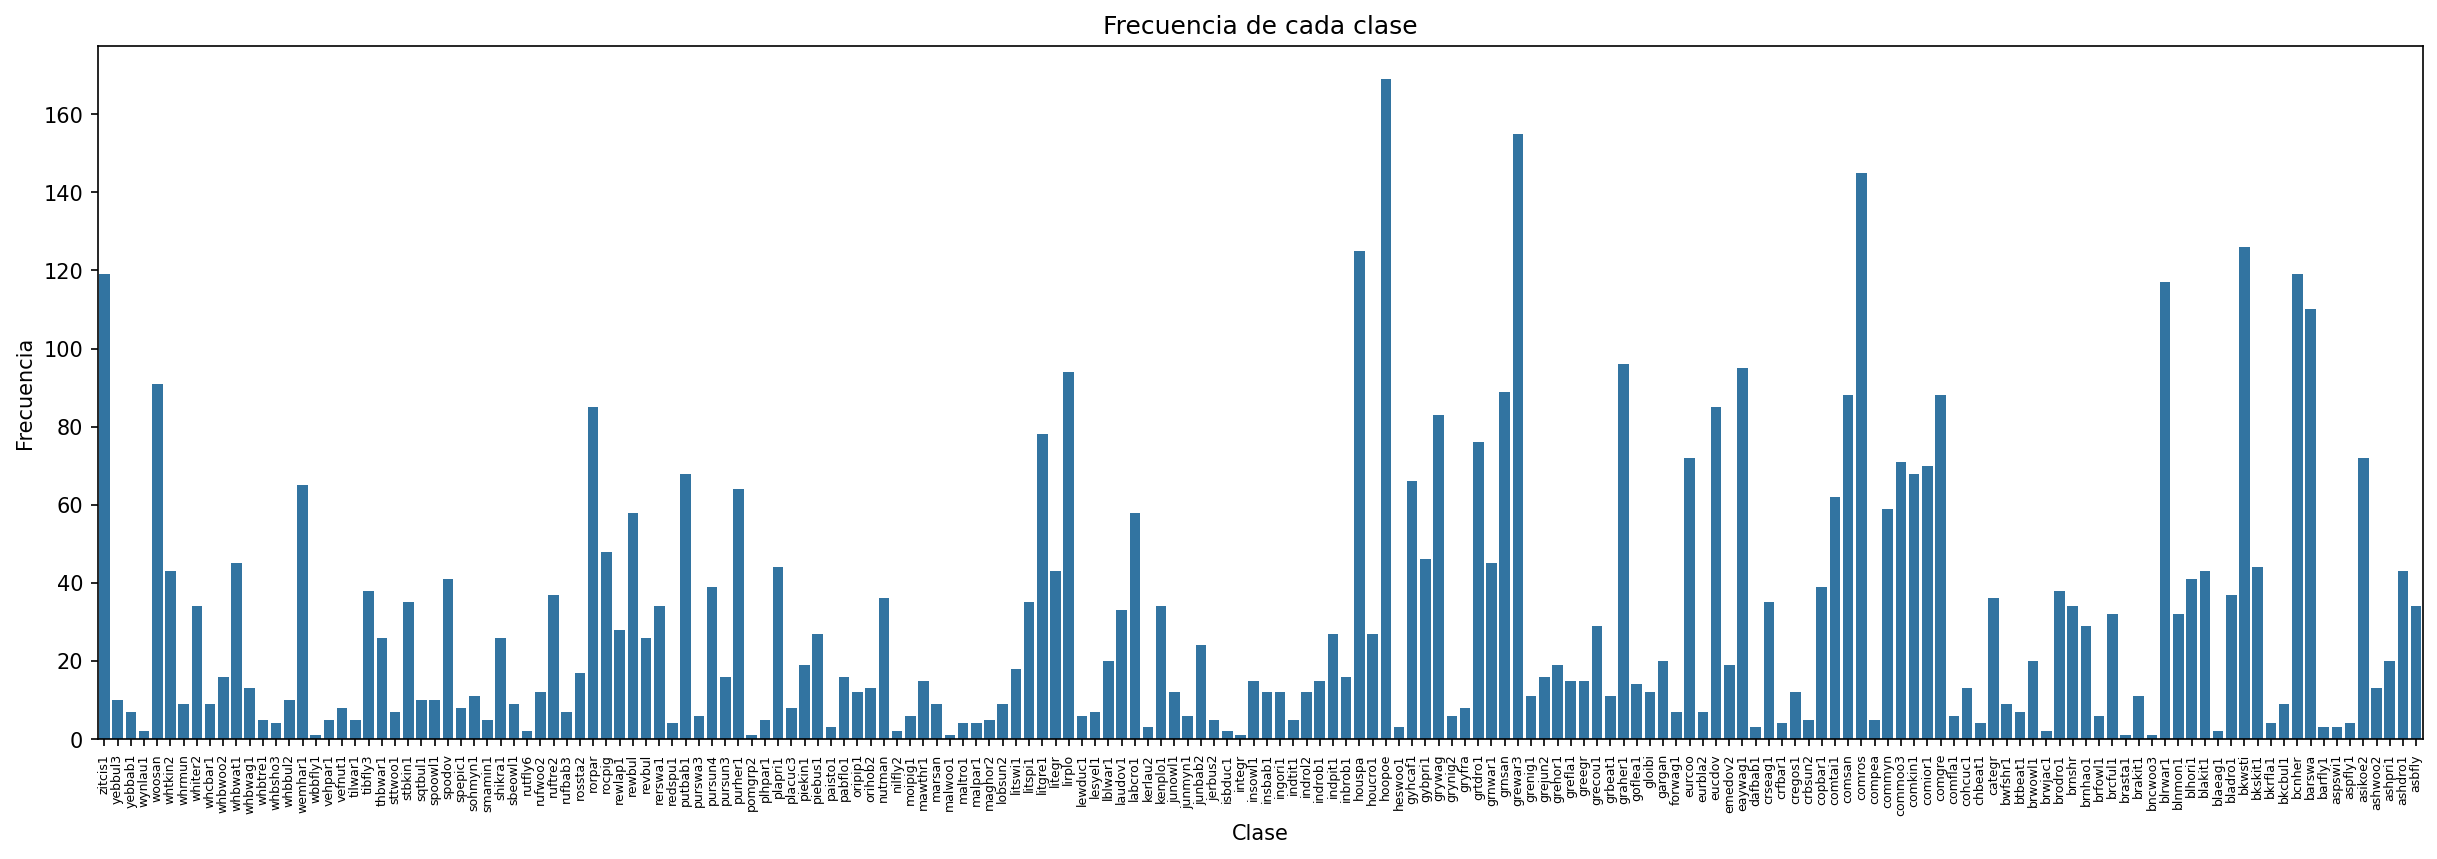

In [19]:
df_con_1 = con_1mn.reset_index()
df_con_1.columns = ['Clase', 'Frecuencia'] # Frecuencia hace referencia al total de audios

df_con_1 = df_con_1.sort_values(by='Clase', ascending=False)

plt.figure(figsize=(20, 6), dpi=150)
sns.barplot(y='Frecuencia', x='Clase', data=df_con_1)
plt.title('Frecuencia de cada clase')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.xticks(fontsize=6,rotation=90)
plt.show()

### 🕒 3 min Audios

Total de audios de 3 minutos por clase

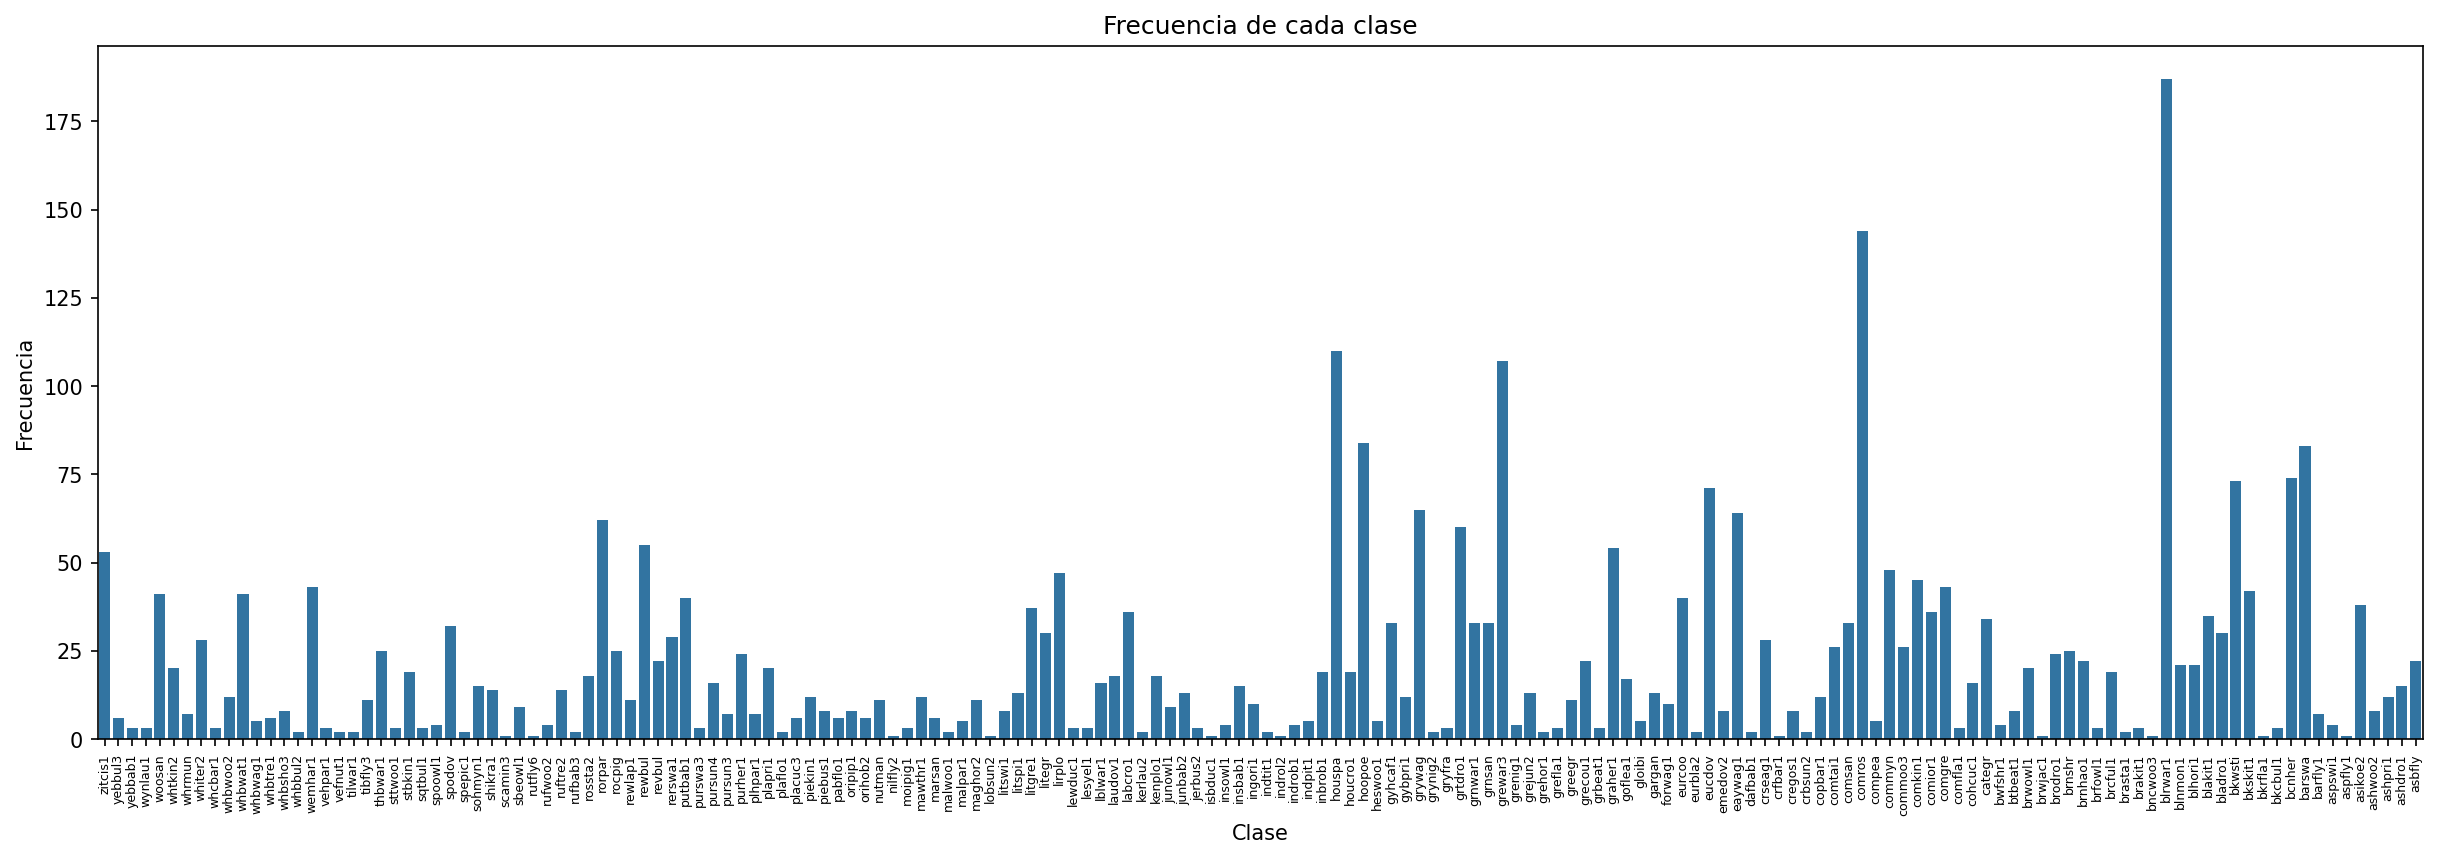

In [20]:
df_con_3 = con_3mn.reset_index()
df_con_3.columns = ['Clase', 'Frecuencia'] # Frecuencia hace referencia al total de audios

df_con_3 = df_con_3.sort_values(by='Clase', ascending=False)

plt.figure(figsize=(20, 6), dpi=150)
sns.barplot(y='Frecuencia', x='Clase', data=df_con_3)
plt.title('Frecuencia de cada clase')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.xticks(fontsize=6,rotation=90)
plt.show()

### 🕔 5 min Audios

Total de audios de 5 minutos por clase

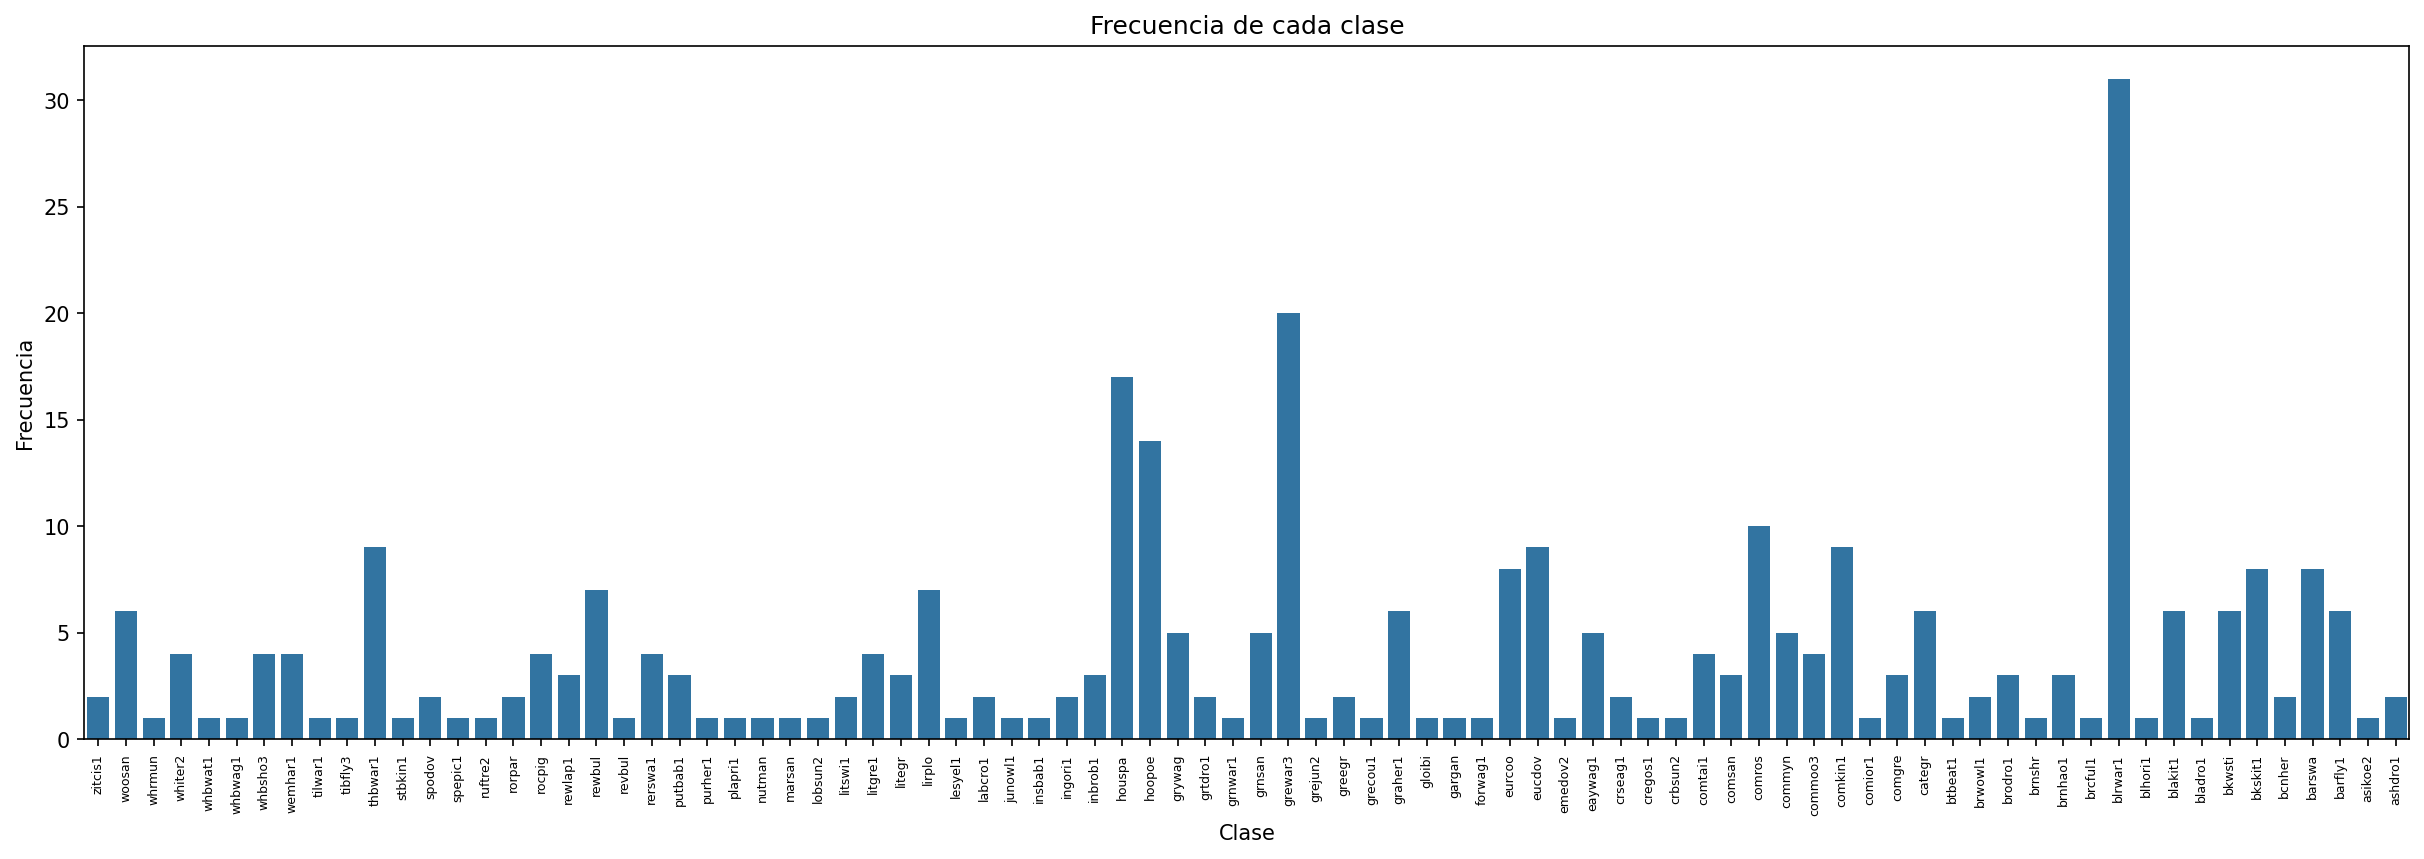

In [21]:
df_con_5 = con_5mn.reset_index()
df_con_5.columns = ['Clase', 'Frecuencia'] # Frecuencia hace referencia al total de audios

df_con_5 = df_con_5.sort_values(by='Clase', ascending=False)

plt.figure(figsize=(20, 6), dpi=150)
sns.barplot(y='Frecuencia', x='Clase', data=df_con_5)
plt.title('Frecuencia de cada clase')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.xticks(fontsize=6,rotation=90)
plt.show()

In [22]:
def get_classes_from_groups(groups):
    tmp = []
    for group in groups:
        for classe in group:
            tmp.append(classe)
    return tmp

In [23]:
class_50 = get_classes_from_groups(groups_of_group[50])
class_100 = get_classes_from_groups(groups_of_group[100])
class_500 = get_classes_from_groups(groups_of_group[300])

### ➡️📁 Copiando imágenes

In [67]:
def get_imgs_names(df):
    img = {}
    for i, clase in enumerate(df['Clase']):
        if clase not in img:
            img[clase] = []
        img[clase].append(df['Audio'].iloc[i].split("\\")[-1].replace('.ogg','.jpg'))
    
    return img

In [68]:
img_1mn = get_imgs_names(df_1mn)
img_3mn = get_imgs_names(df_3mn)
img_5mn = get_imgs_names(df_5mn)

In [44]:
def copy_full_folder(list, path_img, from_path):
    with tqdm(total=len(list), dynamic_ncols=True) as pbar:
        for clase in list:
            pbar.set_description(f'Processing {path_img.split("/")[-2]}')
            
            path = os.path.join(path_img, path_img.split('/')[-2] + '/')

            full_path = os.path.join(from_path, from_path.split('/')[-2] + '/' + clase + '/')

            to_path = os.path.join(path, clase + '/')

            for item in os.listdir(full_path):
                item_or = os.path.join(full_path, item)
                shutil.copy2(item_or, to_path)
            pbar.update(1)

Se copian las imágenes seleccionadas a sus respectivos grupos

In [47]:
stft_mel_50 = copy_full_folder(class_50, stft_mel_50_path, stft_mel_full_images_path) #
stft_mel_100 = copy_full_folder(class_100, stft_mel_100_path, stft_mel_full_images_path) #
stft_mel_500 = copy_full_folder(class_500, stft_mel_500_path, stft_mel_full_images_path) #

stft_mfcc_50 = copy_full_folder(class_50, stft_mfcc_50_path, stft_mfcc_full_images_path) #
stft_mfcc_100 = copy_full_folder(class_100, stft_mfcc_100_path, stft_mfcc_full_images_path) #
stft_mfcc_500 = copy_full_folder(class_500, stft_mfcc_500_path, stft_mfcc_full_images_path) #

Processing stft_mfcc_500: 100%|██████████| 25/25 [00:18<00:00,  1.38it/s]


## ⚖️ Balanceo de clases

Se balancean las clases de acuerdo con un criterio propio, ya que, como se muestra a continuación, algunas clases cuentan con muchas más imágenes.

In [ ]:
def files_in_dir(path):
    classes = {}
    full_path_dir = os.path.join(path, path.split('/')[-2] + '/')
    for dir_ in os.listdir(full_path_dir):
        class_path = os.path.join(full_path_dir, dir_ + '/')
        coun_files = len([f for f in os.listdir(class_path)])
        if dir_ not in classes:
            classes[dir_] = []
        classes[dir_].append(coun_files)
    
    return classes


In [54]:
def accepted_classes(group_series):
    accepted = {}

    for v in group_series.items():
        accepted[v[0]] = v[1]

    return accepted

In [15]:
group_mel_1m = files_in_dir(stft_mel_1mn_path)
group_mfcc_1m = files_in_dir(stft_mfcc_1mn_path)

group_mel_3m = files_in_dir(stft_mel_3mn_path)
group_mfcc_3m = files_in_dir(stft_mfcc_3mn_path)

group_mel_5m = files_in_dir(stft_mel_5mn_path)
group_mfcc_5m = files_in_dir(stft_mfcc_5mn_path)

In [ ]:
mel_1m = accepted_classes(con_1mn)
mel_3m = accepted_classes(con_3mn)
mel_5m = accepted_classes(con_5mn)

#### Grupos MFCC y Mel (1m, 3m, 5m)

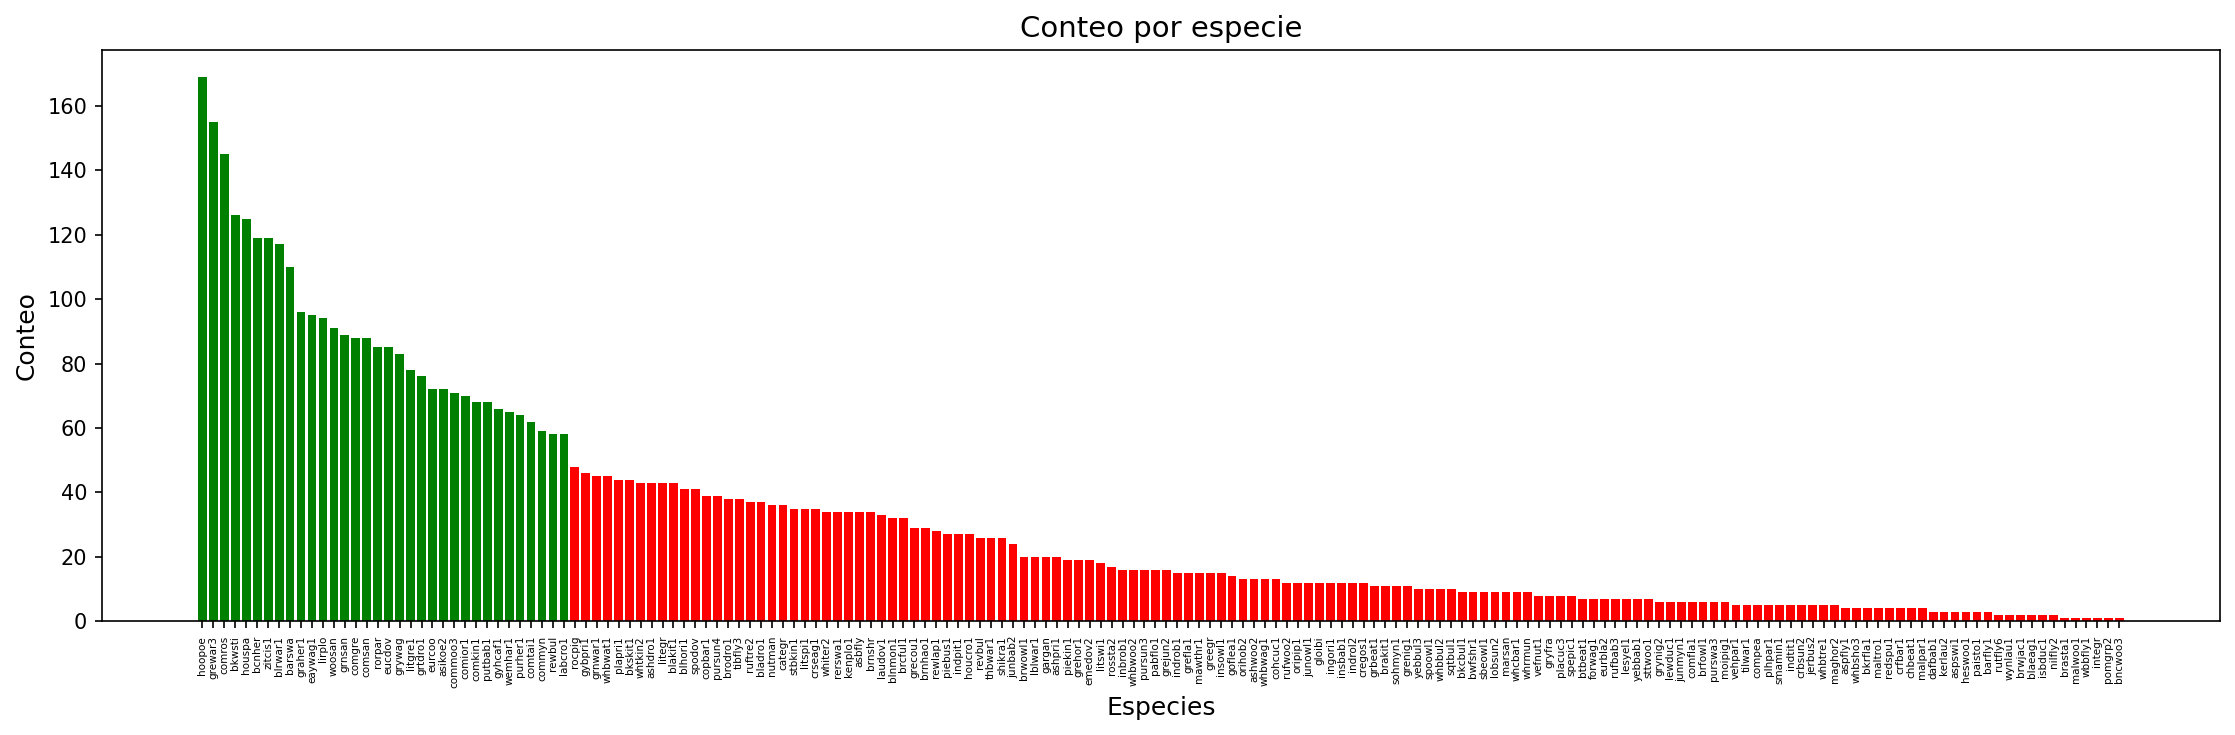

In [46]:
# Extraer claves y valores del diccionario
labels = list(mel_1m.keys())
values = [v for v in mel_1m.values()]  # Extraer los valores (ya que están en listas)

colors = ['red' if value < 50 else 'green' for value in values]

# Crear gráfico de barras
plt.figure(figsize=(15, 5), dpi=150)  # Ajustar tamaño de la figura
plt.bar(labels, values, color=colors)

# Configurar etiquetas y título
plt.xlabel('Especies', fontsize=12)
plt.ylabel('Conteo', fontsize=12)
plt.title('Conteo por especie', fontsize=14)
plt.xticks(rotation=90, fontsize=5)  # Rotar etiquetas en el eje X

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Para este primer grupo **se seleccionarán las clases con 50 o más imágenes**

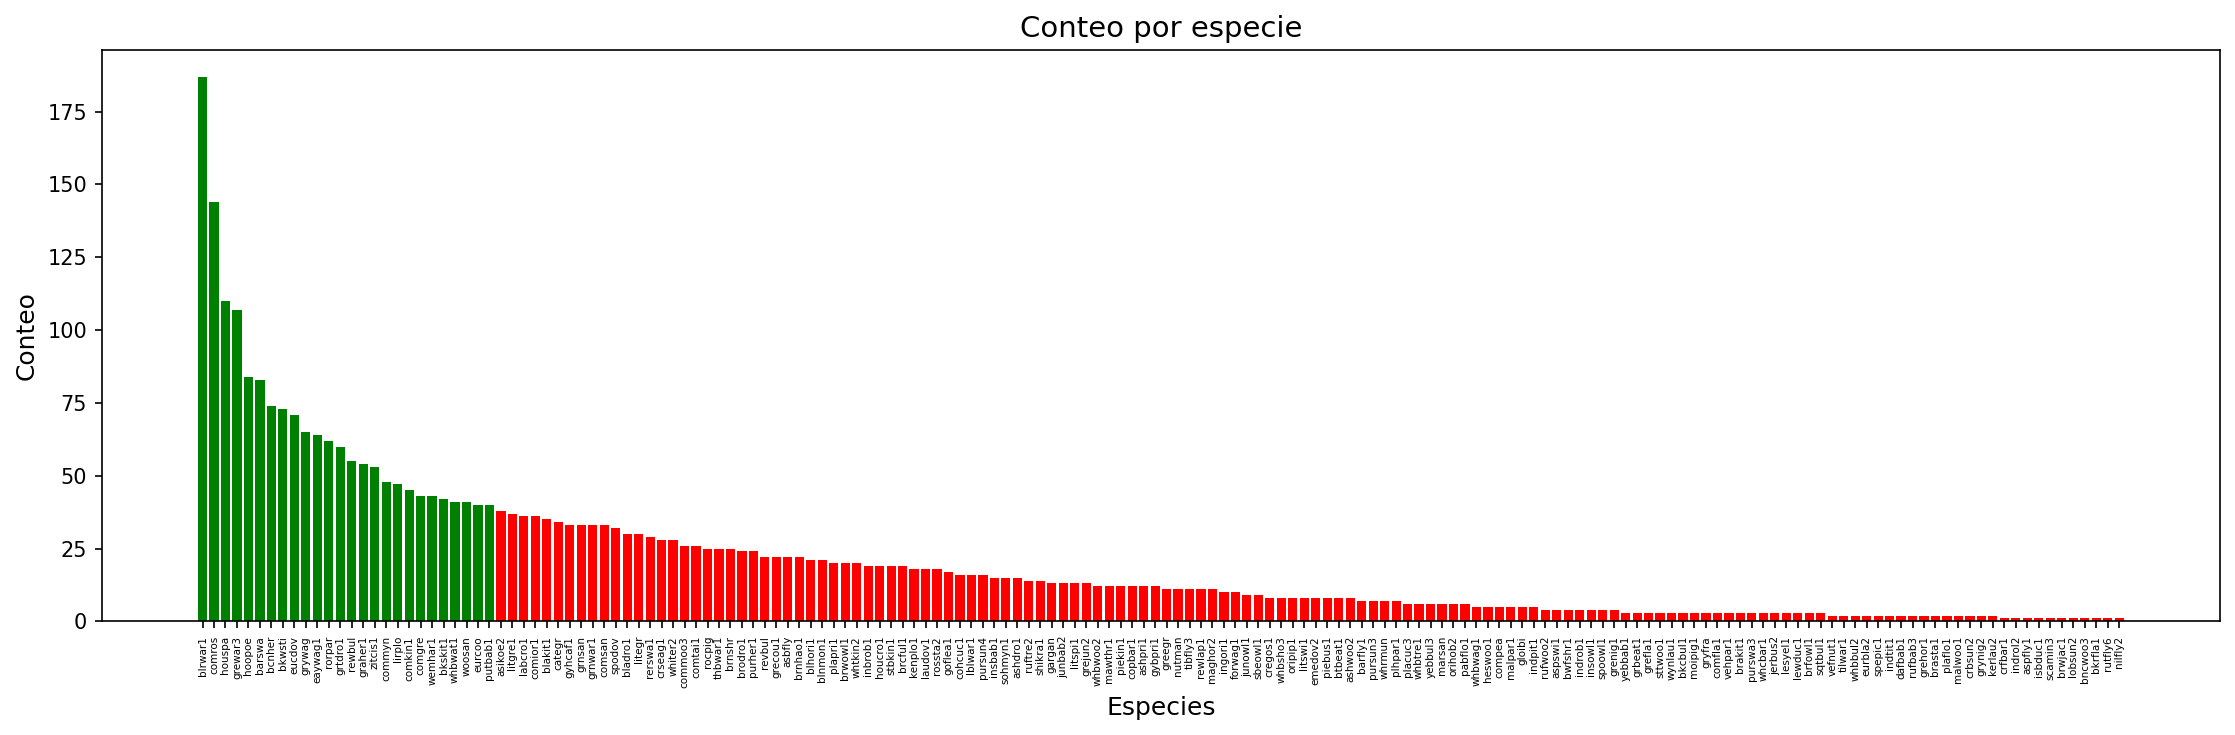

In [49]:
# Extraer claves y valores del diccionario
labels = list(mel_3m.keys())
values = [v for v in mel_3m.values()]  # Extraer los valores (ya que están en listas)

colors = ['red' if value < 40 else 'green' for value in values]

# Crear gráfico de barras
plt.figure(figsize=(15, 5), dpi=150)  # Ajustar tamaño de la figura
plt.bar(labels, values, color=colors)

# Configurar etiquetas y título
plt.xlabel('Especies', fontsize=12)
plt.ylabel('Conteo', fontsize=12)
plt.title('Conteo por especie', fontsize=14)
plt.xticks(rotation=90, fontsize=5)  # Rotar etiquetas en el eje X

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Para este grupo **se seleccionarán las clases con 40 o mas imágenes**

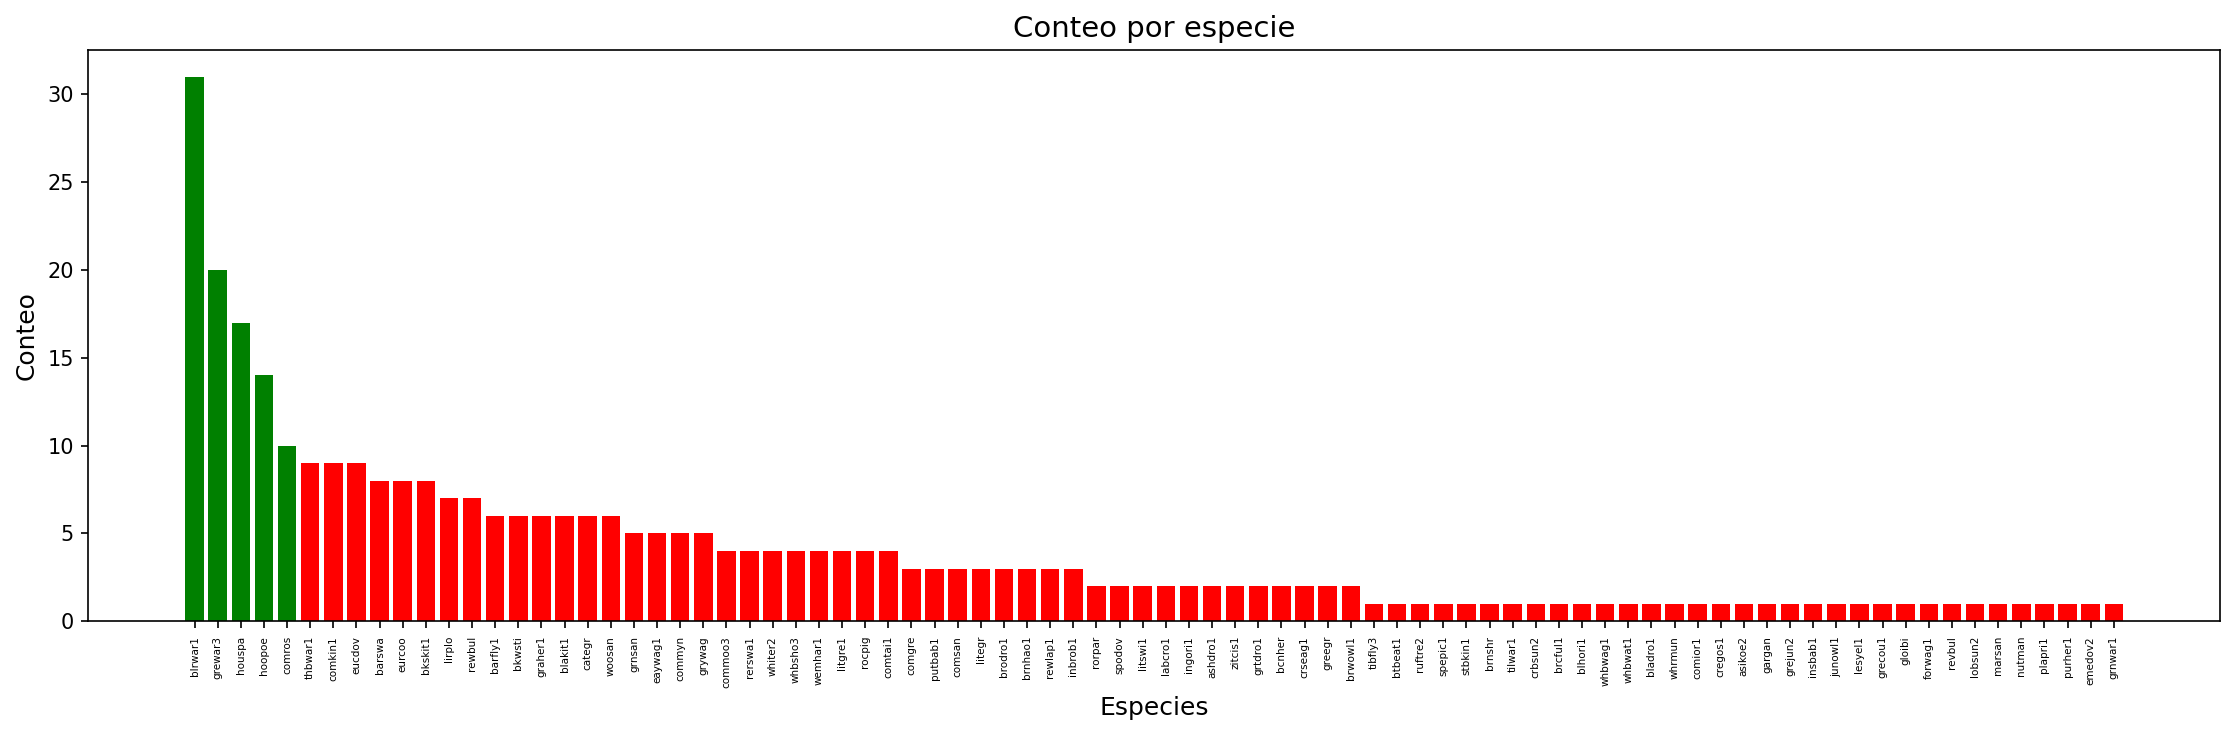

In [51]:
# Extraer claves y valores del diccionario
labels = list(mel_5m.keys())
values = [v for v in mel_5m.values()]  # Extraer los valores (ya que están en listas)

colors = ['red' if value < 10 else 'green' for value in values]

# Crear gráfico de barras
plt.figure(figsize=(15, 5), dpi=150)  # Ajustar tamaño de la figura
plt.bar(labels, values, color=colors)

# Configurar etiquetas y título
plt.xlabel('Especies', fontsize=12)
plt.ylabel('Conteo', fontsize=12)
plt.title('Conteo por especie', fontsize=14)
plt.xticks(rotation=90, fontsize=5)  # Rotar etiquetas en el eje X

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Para este grupo **se seleccionarán las clases con 10 o mas imágenes**

## Creando los grupos balanceados

In [63]:
def balanced_groups(group_series, total):
    group = {}

    for v in group_series.items():
        if v[1] >= total:
            group[v[0]] = v[1]

    return group

In [95]:
def copy(accepted_classes, img_dict, path_img, from_path):
    with tqdm(total=len(img_dict), dynamic_ncols=True) as pbar:
        for i, classe in enumerate(img_dict['Audio']):
            pbar.set_description(f'Processing {path_img.split("/")[-2]}')
            
            class_name = img_dict['Audio'].iloc[i].split('\\')[-2].split('/')[-1]
            
            if class_name in accepted_classes:
                audio_name = img_dict['Audio'].iloc[i].split('\\')[-1]
                
                path = os.path.join(path_img, path_img.split('/')[-2] + '/')
                full_path = os.path.join(from_path, from_path.split('/')[-2] + '/' + class_name + '/')
                full_from_path = os.path.join(full_path, audio_name)

                to_path = os.path.join(path, class_name + '/')
                
                shutil.copy(full_from_path.replace('.ogg','.jpg'), to_path)
                
            pbar.update(1)

In [64]:
balanced_1m = balanced_groups(con_1mn, 50)
balanced_3m = balanced_groups(con_3mn, 40)
balanced_5m = balanced_groups(con_5mn, 10)

In [81]:
make_folders(stft_mel_1mn_path, balanced_1m)
make_folders(stft_mfcc_1mn_path, balanced_1m)

make_folders(stft_mel_3mn_path, balanced_3m)
make_folders(stft_mfcc_3mn_path, balanced_3m)

make_folders(stft_mel_5mn_path, balanced_5m)
make_folders(stft_mfcc_5mn_path, balanced_5m)

Carpeta creada: ./dataset/images/stft_mel_1mn/stft_mel_1mn/hoopoe
Carpeta creada: ./dataset/images/stft_mel_1mn/stft_mel_1mn/grewar3
Carpeta creada: ./dataset/images/stft_mel_1mn/stft_mel_1mn/comros
Carpeta creada: ./dataset/images/stft_mel_1mn/stft_mel_1mn/bkwsti
Carpeta creada: ./dataset/images/stft_mel_1mn/stft_mel_1mn/houspa
Carpeta creada: ./dataset/images/stft_mel_1mn/stft_mel_1mn/bcnher
Carpeta creada: ./dataset/images/stft_mel_1mn/stft_mel_1mn/zitcis1
Carpeta creada: ./dataset/images/stft_mel_1mn/stft_mel_1mn/blrwar1
Carpeta creada: ./dataset/images/stft_mel_1mn/stft_mel_1mn/barswa
Carpeta creada: ./dataset/images/stft_mel_1mn/stft_mel_1mn/graher1
Carpeta creada: ./dataset/images/stft_mel_1mn/stft_mel_1mn/eaywag1
Carpeta creada: ./dataset/images/stft_mel_1mn/stft_mel_1mn/lirplo
Carpeta creada: ./dataset/images/stft_mel_1mn/stft_mel_1mn/woosan
Carpeta creada: ./dataset/images/stft_mel_1mn/stft_mel_1mn/grnsan
Carpeta creada: ./dataset/images/stft_mel_1mn/stft_mel_1mn/comgre
Carpe

'./dataset/images/stft_mfcc_5mn/stft_mfcc_5mn/'

### Copy balanced classes

In [96]:
copy(balanced_1m, df_1mn ,stft_mel_1mn_path, stft_mel_full_images_path)
copy(balanced_1m, df_1mn, stft_mfcc_1mn_path, stft_mfcc_full_images_path)

copy(balanced_3m, df_3mn ,stft_mel_3mn_path, stft_mel_full_images_path)
copy(balanced_3m, df_3mn ,stft_mfcc_3mn_path, stft_mfcc_full_images_path)

copy(balanced_5m, df_5mn ,stft_mel_5mn_path, stft_mel_full_images_path)
copy(balanced_5m, df_5mn ,stft_mfcc_5mn_path, stft_mfcc_full_images_path)

Processing stft_mfcc_5mn: 100%|██████████| 326/326 [00:00<00:00, 648.55it/s]


# Referencias

[1] D. Montoro Rodríguez, Seguimiento de locutor para autenticación biométrica en dispositivos móviles, Tesis de grado, Grado en Ingeniería de Sonido e Imagen, Universidad [Universidad Politécnica de Madrid], 2023.